<a href="https://colab.research.google.com/github/YuriArduino/RAG_Evaluation_and_Hyperparameter_Tuning/blob/main/RAG_Evaluation_and_Hyperparameter_Tuning_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preâmbulo: A Jornada de um Framework de Avaliação de RAG**

O que começou como um exercício da **Aula 2 da Imersão Dev (Agentes de IA) da Alura**, focado em construir um sistema simples de RAG (Retrieval-Augmented Generation), rapidamente se transformou em uma pergunta muito mais profunda e fundamental: **como podemos medir, otimizar e, acima de tudo, confiar nos resultados de um sistema de RAG?**

A resposta a essa pergunta é a jornada documentada neste notebook: uma evolução da incerteza inicial para a engenharia de IA baseada em evidências.

## **Da Incerteza à Engenharia**

A intuição inicial era clara: aceitar os parâmetros padrão de um `splitter` ou `retriever` é trabalhar às cegas. Um sistema de IA que não pode ser medido não é confiável. A verdadeira virada aconteceu ao confrontar e, finalmente, **resolver** os desafios do mundo real:

1.  **O Problema da Relevância:** Para determinar objetivamente se os `chunks` recuperados eram úteis, implementamos um "LLM Juiz" que avaliou a relevância de cada trecho, fornecendo uma base para métricas de precisão.
2.  **O Problema da Alucinação:** Para garantir que o sistema soubesse o que não sabe, incluímos um teste de estresse com uma pergunta fora de escopo ("Quantas capivaras tem no Rio Pinheiros?"). O resultado foi um sucesso: o sistema não inventou uma resposta, validando sua robustez.
3.  **O Problema da Otimização:** Para encontrar a melhor combinação de `chunk_size` e `chunk_overlap`, construímos um pipeline de análise comparativa que testou sistematicamente múltiplas estratégias, permitindo uma decisão baseada em dados concretos.

## **A Arquitetura da Solução: Um Laboratório de MLOps**

A resposta exigiu uma refatoração completa, quebrando um script monolítico em um conjunto de **especialistas de software**, cada um com sua responsabilidade única, inspirados nos princípios de design SOLID:

*   Um **`LLMAdapter`** para criar uma camada resiliente e unificada sobre a API do LLM.
*   Um **`RelevanceEvaluator`** para atuar como nosso "LLM Juiz" automatizado.
*   Um **`MetricsCalculator`** para computar métricas padrão da indústria (Precision, Recall, F1-Score) de forma consistente.
*   E a peça central: um **`GroundTruthGenerator`**.

### **A Inovação: `LLM-derived Ground-Truth`**

Em vez de criar um "gabarito" manual – um processo lento e sujeito a viés –, utilizamos a própria IA como uma "anotadora de dados". O `GroundTruthGenerator` varreu todo o nosso conhecimento e usou o Gemini para criar um gabarito objetivo, que se tornou a nossa "verdade fundamental" para todos os testes subsequentes. Essa abordagem não apenas acelerou o processo, mas também introduziu um nível de consistência difícil de alcançar manualmente.

## **O Resultado Final: Um Framework Científico**

Este notebook evoluiu de uma simples implementação de RAG para um **framework de avaliação** completo, um verdadeiro laboratório de MLOps que permite a qualquer desenvolvedor:

1.  **Carregar** um conjunto de documentos de forma robusta.
2.  **Definir** múltiplas estratégias de RAG para comparar lado a lado.
3.  **Gerar** um gabarito de alta qualidade de forma automática e com cache.
4.  **Executar** uma análise comparativa sistemática para medir a performance.
5.  **Visualizar** os resultados em um dashboard claro e acionável.

### **Principais Descobertas e Conclusões da Análise**

O framework não apenas funcionou, mas também gerou insights valiosos:

*   **Estratégia Vencedora Identificada:** A estratégia **`Grande (300/30)`** emergiu como a mais performática, alcançando o melhor F1-Score médio (34.09%) ao equilibrar um Recall excelente (75%) com uma precisão sólida (25%).
*   **Robustez Comprovada:** O framework validou a confiabilidade do sistema. Para perguntas fora de escopo, o RAG não alucinou, resultando corretamente em 0% de acertos.
*   **Decisão Data-Driven:** O processo de otimização de RAG, antes subjetivo, foi transformado em um ciclo de MLOps, permitindo a seleção da melhor arquitetura com base em evidências quantitativas.

## **Capítulo 1: Preparação do Ambiente de Análise**

Esta é a célula fundamental que prepara todo o nosso ambiente de trabalho. Ela é dividida em duas etapas essenciais: a **instalação das ferramentas** e a **importação dos módulos** que usaremos ao longo do notebook.

### **1.1 Instalações Necessárias**

A primeira linha de comando (`!pip install...`) funciona como a montagem da nossa "bancada de trabalho". Ela instala todas as bibliotecas externas que o nosso projeto precisa para funcionar. O `-q` (`quiet`) apenas torna a saída menos verbosa.

**O "Porquê" de cada ferramenta:**

*   **Análise e Visualização:**
    *   `pandas`, `matplotlib`, `seaborn`: A tríade clássica da ciência de dados em Python. Usaremos para estruturar e plotar nossos resultados finais em tabelas e gráficos.
*   **Componentes do Pipeline RAG (LangChain):**
    *   `langchain_community`, `langchain_google_genai`: O coração da nossa conexão com os modelos do Google.
    *   `faiss-cpu`: A nossa "memória vetorial". É o banco de dados da Meta AI que armazena os embeddings dos nossos documentos de forma eficiente, rodando na CPU (não exige GPU).
    *   `pymupdf`: Um leitor de PDFs de alta performance, que o LangChain usa para extrair o texto dos nossos arquivos de políticas.
*   **Utilitários:**
    *   `requests`: O "carteiro" da internet. Usado para baixar os arquivos PDF a partir das URLs do GitHub.

### **1.2 Imports**

Após instalar as ferramentas, esta seção as "liga" e as torna disponíveis para uso no nosso notebook. Organizamos os imports em grupos lógicos para maior clareza.

*   **Módulos Padrão do Python:**
    *   Ferramentas essenciais para manipulação de sistema (`os`), dados (`json`), tempo (`time`), texto (`re`), arquivos (`tempfile`), estatísticas (`statistics`), erros (`traceback`) e datas (`datetime`).
    *   `dataclasses`, `typing`, `abc`: Módulos que nos ajudam a escrever um código mais moderno, estruturado e seguro, definindo "contratos" claros para nossas classes e funções.

*   **Módulos de Análise de Dados:**
    *   `pandas as pd`, `matplotlib.pyplot as plt`, `seaborn as sns`: Importamos a tríade com seus apelidos convencionais (`pd`, `plt`, `sns`), uma prática padrão na comunidade.

*   **Módulos Específicos do LangChain:**
    *   Aqui importamos as "peças de LEGO" específicas que vamos montar: o **Modelo de Linguagem** (`ChatGoogleGenerativeAI`), o **Modelo de Embedding** (`GoogleGenerativeAIEmbeddings`), o **Carregador de Documentos** (`PyMuPDFLoader`), o **Divisor de Texto** (`RecursiveCharacterTextSplitter`) e a **Base de Vetores** (`FAISS`).

> **Nota para o Futuro:** Se algum dia o notebook quebrar com um erro de `ModuleNotFoundError`, é muito provável que a solução esteja em adicionar a biblioteca faltante na lista de instalações da seção 1.1.

---

In [ ]:
# 1.1 Instalações necessárias
!pip install -q pandas matplotlib seaborn langchain_community langchain_google_genai faiss-cpu pymupdf requests


# 1.2 Imports
# Built-in
import os
import json
import time
import re
import tempfile
import statistics
import traceback
from dataclasses import dataclass, field
from typing import List, Dict, Any, Optional, Tuple, Protocol
from datetime import datetime
from urllib.parse import unquote
from abc import ABC, abstractmethod
from pathlib import Path
import pickle
import hashlib
import logging
from typing import List, Optional

from pydantic import BaseModel



# Third-party
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langchain_google_genai import ChatGoogleGenerativeAI, GoogleGenerativeAIEmbeddings
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS


## **Capítulo 2: Definindo as Estruturas de Dados (Data Models)**

Antes de escrevermos a lógica complexa do nosso analisador, definimos claramente as **estruturas de dados** que ele irá manipular.  
Separar a definição dos dados da lógica (o código que os processa) é uma prática de engenharia de software chamada **Separação de Preocupações** (`Separation of Concerns`), que torna nosso código mais organizado, seguro e fácil de entender.

Desta vez, em vez de usarmos `@dataclass` do Python puro, adotamos **Pydantic v2 (`BaseModel`)**.  
Isso nos traz **superpoderes adicionais**:

* **Validação automática de tipos**: se tentarmos atribuir um `str` em um campo que deveria ser `float`, o Pydantic gera um erro imediatamente.
* **Serialização prática**: podemos salvar e carregar resultados facilmente usando `.model_dump()` e `.model_validate_json()`.
* **Imutabilidade opcional**: podemos "congelar" os objetos para que não sejam alterados acidentalmente depois de criados.

---

### **Os Nossos Modelos de Dados (versão Pydantic v2):**

1. **`ChunkAnalysisResult`**  
   - **Propósito:** Representa o resultado da análise de **um único chunk** recuperado pelo sistema de busca.  
   - Campos: conteúdo, score de similaridade, julgamento de relevância, confiança do LLM, raciocínio textual e tempo de execução.

2. **`AnalysisMetrics`**  
   - **Propósito:** Consolida todas as **métricas de performance quantitativas** de um experimento.  
   - Campos: precisão, recall, f1-score, precisão em diferentes `k`, verdadeiros positivos, contagem de recuperados e de ground truth.

3. **`ChunkingStrategy`**  
   - **Propósito:** Define formalmente uma "receita" de chunking, com seu nome, tamanho e sobreposição.  
   - Campos: `name`, `chunk_size` e `chunk_overlap`.

4. **`RetrievalExperiment`**  
   - **Propósito:** É o nosso **objeto principal de resultados**.  
   - Campos: estratégia usada, query, `k` testado, chunks recuperados, resultados individuais, métricas consolidadas, tempo de execução e recomendações adicionais.

> **Nota para o Futuro:** Ao usar Pydantic v2, qualquer tentativa de instanciar esses objetos com tipos errados gerará um erro de validação imediato. Isso previne muitos bugs silenciosos durante o desenvolvimento.

---

In [ ]:
# Imports necessários para os modelos Pydantic
from pydantic import BaseModel, Field
from typing import List, Dict, Optional

# --- Modelos de Dados Principais (Pydantic) ---

class ChunkAnalysisResult(BaseModel):
    """Resultado da análise de um chunk individual."""
    # Corrigido: O ID é uma string gerada (ex: "arquivo.pdf::p0::c1")
    id: str
    content: str
    score: float
    is_relevant: bool
    confidence_score: Optional[float] = None
    reasoning: Optional[str] = None
    evaluation_time: Optional[float] = None


class AnalysisMetrics(BaseModel):
    """Métricas de performance de um experimento."""
    precision: float
    recall: float
    f1_score: float
    precision_at_k: Dict[int, float]
    true_positives: int
    retrieved_count: int
    ground_truth_count: int


class ChunkingStrategy(BaseModel):
    """Define uma estratégia de chunking a ser testada."""
    name: str
    chunk_size: int
    chunk_overlap: int


class RetrievalExperiment(BaseModel):
    """Resultado completo de um experimento de retrieval."""
    strategy: ChunkingStrategy
    query: str
    k_tested: int
    total_chunks: int
    results: List[ChunkAnalysisResult]
    metrics: AnalysisMetrics
    execution_time: float
    recommended_threshold: Optional[float] = None

    class Config:
        # Pydantic v2 não usa mais frozen=True aqui, mas a imutabilidade é o padrão.
        # Para garantir, podemos usar ConfigDict
        from pydantic import ConfigDict
        model_config = ConfigDict(frozen=True)

## **Capítulo 3: Definindo os Contratos de Comportamento (Protocolos)**

Nesta célula, definimos as **interfaces** ou **contratos** para os componentes externos do nosso sistema, como o modelo de linguagem (LLM) e o banco de dados de vetores (Vector Store).

Em vez de acoplar nosso analisador diretamente a uma classe específica (como `ChatGoogleGenerativeAI` ou `FAISS`), nós usamos `Protocol` do Python.  
Um protocolo define **o que um objeto deve ser capaz de fazer**, sem se importar com **como ele faz**.  
É como definir o que significa ser um "veículo" (ter rodas, acelerar, frear) sem se prender a uma "Ferrari" ou um "Fusca".

Essa abordagem, conhecida como **Inversão de Dependência**, torna nosso código extremamente flexível e fácil de testar.

---

### **Os Nossos Contratos:**

1. **`LLMClient`**
   - **Contrato:** Qualquer objeto que queira atuar como um cliente de LLM em nosso sistema **deve** ter um método chamado `invoke` que aceita uma `string` (o prompt) e retorna um dicionário com os resultados.
   - **Benefício:** Se amanhã quisermos trocar o Gemini pelo OpenAI, ou por um modelo local via Ollama, não precisamos mudar nada no nosso `AdvancedRAGAnalyzer`. Basta criar um novo "adaptador" que implemente este protocolo.

2. **`VectorStore`**
   - **Contrato:** Qualquer objeto que queira atuar como um banco de dados de vetores **deve** ter um método `similarity_search_with_score` que busca por uma `query` e retorna uma lista de documentos e seus scores.
   - **Benefício:** Se no futuro decidirmos que o `FAISS` não é mais a melhor opção e quisermos migrar para `ChromaDB`, `Pinecone` ou outro serviço, nosso analisador continuará funcionando perfeitamente, desde que o novo banco de dados respeite este contrato.

> **Nota para o Futuro:** O uso de Protocolos é o que permite a **injeção de dependência**.  
> Em vez de o nosso analisador *criar* suas próprias dependências (o LLM, o Vector Store), ele as recebe prontas em seu construtor (`__init__`).  
> Isso facilita imensamente os testes, pois podemos "injetar" versões falsas (mocks) do LLM e do Vector Store para testar a lógica do analisador de forma isolada, sem fazer chamadas de API reais.

---

In [ ]:
from typing import Protocol, Any


class LLMClient(Protocol):
    """Protocolo para clientes LLM."""
    def invoke(self, prompt: str) -> dict[str, Any]:
        """Invoca o LLM com um prompt e retorna resposta normalizada."""
        ...


class VectorStore(Protocol):
    """Protocolo para vector stores."""
    def similarity_search_with_score(self, query: str, k: int) -> list[tuple[Any, float]]:
        """Busca por similaridade retornando documentos e scores."""
        ...

## **Capítulo 4: Implementando o Sistema de Cache Persistente**

"""
A etapa de geração de "ground truth" e a avaliação de cada chunk são os gargalos de performance
e custo do nosso pipeline. Executar dezenas ou centenas de chamadas de API a cada vez que rodamos
o notebook é inviável.

A classe `ExperimentCache` resolve esse problema com um sistema de **cache persistente** que:
1. Gera chaves únicas baseadas em parâmetros + conteúdo dos documentos.
2. Usa `pickle` para salvar e restaurar experimentos completos.
3. Faz logging estruturado para depuração profissional.

Assim, rodamos uma análise pesada uma vez e depois reutilizamos os resultados em segundos.


In [ ]:
import json
import hashlib
import logging
import tempfile
import os
from datetime import datetime, timezone
from pathlib import Path
from typing import List, Optional, Any, Dict, Set

# Configuração básica de logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(name)s - %(levelname)s - %(message)s"
)

# --- Funções Auxiliares de Cache Seguro (nível de módulo) ---

def _safe_write_json(path: Path, obj: dict) -> None:
    """
    Escrita atômica: escreve em um arquivo temporário e depois o renomeia para
    evitar a criação de arquivos de cache corrompidos ou vazios.
    """
    path.parent.mkdir(parents=True, exist_ok=True)
    # Cria um arquivo temporário no mesmo diretório para garantir que a renomeação seja atômica
    fd, tmp_path_str = tempfile.mkstemp(dir=str(path.parent))
    tmp_path = Path(tmp_path_str)
    try:
        with os.fdopen(fd, "w", encoding="utf-8") as f:
            json.dump(obj, f, indent=2, ensure_ascii=False)
            f.flush()
            os.fsync(f.fileno()) # Garante que os dados sejam escritos no disco
        # Renomeia o arquivo temporário para o nome final.
        tmp_path.replace(path)
    except Exception as e:
        # Em caso de falha, remove o arquivo temporário para não deixar lixo
        if tmp_path.exists():
            tmp_path.unlink()
        raise e

def _load_json_safe(path: Path, logger: logging.Logger) -> Optional[dict]:
    """
    Carrega um arquivo JSON de forma segura. Se o arquivo estiver corrompido,
    move o arquivo para .corrupt para auditoria e retorna None.
    """
    try:
        with open(path, "r", encoding="utf-8") as f:
            data = json.load(f)
        if not isinstance(data, dict):
            raise ValueError("O cache JSON não contém um objeto (dicionário) na raiz.")
        return data
    except (json.JSONDecodeError, ValueError) as e:
        logger.warning(f"Cache corrompido detectado em '{path}': {e}. Movendo para '{path}.corrupt'.")
        try:
            corrupt_path = path.with_suffix(path.suffix + ".corrupt")
            if corrupt_path.exists():
                # Adiciona um timestamp para não sobrescrever arquivos corrompidos anteriores
                ts = int(datetime.now(timezone.utc).timestamp())
                corrupt_path = path.with_name(f"{path.stem}.corrupt.{ts}{path.suffix}")
            path.replace(corrupt_path)
        except Exception as ee:
            logger.error(f"Falha ao mover arquivo corrompido '{path}': {ee}. Tentando apagar.")
            if path.exists(): path.unlink(missing_ok=True)
        return None


# --- Classe ExperimentCache Aprimorada ---

class ExperimentCache:
    """
    Sistema de cache robusto com escrita atômica, autocorreção e metadados de rastreabilidade.
    """
    def __init__(self, cache_dir: str = ".rag_cache"):
        self.cache_dir = Path(cache_dir)
        self.gt_cache_dir = self.cache_dir / "ground_truth"
        self.vectorstore_meta_dir = self.cache_dir / "vectorstore_meta"
        self.gt_cache_dir.mkdir(parents=True, exist_ok=True)
        self.vectorstore_meta_dir.mkdir(parents=True, exist_ok=True)
        self.logger = logging.getLogger(self.__class__.__name__)
        self.logger.info(f"Cache inicializado no diretório: {self.cache_dir.resolve()}")


    def _hash_docs_content(self, documents: List[Any]) -> str:
        """Gera um hash do conteúdo dos documentos para detectar mudanças."""
        parts = []
        for doc in sorted(documents, key=lambda d: getattr(d, "metadata", {}).get("source", "")):
            # Corrected: Assign meta first before using it
            meta = getattr(doc, "metadata", {}) or {}
            src = str(meta.get("source", "unknown"))
            page = str(meta.get("page", "0"))
            sample = (getattr(doc, "page_content", "") or "")[:200]
            parts.append(f"{src}|p{page}|{sample}")
        return hashlib.md5("\n".join(parts).encode("utf-8")).hexdigest()


    def _get_gt_cache_path(self, query: str, docs_hash: str) -> Path:
        query_hash = hashlib.sha1(query.encode()).hexdigest()[:12]
        return self.gt_cache_dir / f"gt_{query_hash}_{docs_hash}.json"

    def get_ground_truth(self, query: str, documents: List[Any]) -> Optional[Set[str]]:
        """Carrega o GT do cache, validando o conteúdo e retornando um set."""
        docs_hash = self._hash_docs_content(documents)
        cache_path = self._get_gt_cache_path(query, docs_hash)
        if not cache_path.exists(): return None

        data = _load_json_safe(cache_path, self.logger)
        if not data: return None

        relevant_ids = data.get("relevant_ids")
        if relevant_ids is None:
            self.logger.warning(f"Cache de GT em '{cache_path}' não tem a chave 'relevant_ids'. Tratando como corrompido.")
            corrupt_path = cache_path.with_suffix(cache_path.suffix + ".invalid")
            cache_path.replace(corrupt_path)
            return None

        return set(relevant_ids)

    def save_ground_truth(self, ground_truth_set: Set[str], query: str, documents: List[Any], model_info: Optional[Dict] = None):
        """Salva o GT em um formato JSON estruturado usando escrita atômica e com metadados."""
        docs_hash = self._hash_docs_content(documents)
        cache_path = self._get_gt_cache_path(query, docs_hash)

        payload = {
            "schema_version": 1.1,
            "created_at": datetime.now(timezone.utc).isoformat(),
            "query": query,
            "doc_hash": docs_hash,
            "relevant_ids": sorted(list(ground_truth_set)),
            "meta": model_info or {}
        }

        try:
            _safe_write_json(cache_path, payload)
            self.logger.info(f"Ground Truth salvo em: {cache_path} (itens: {len(ground_truth_set)})")
        except Exception as e:
            self.logger.error(f"Falha ao salvar Ground Truth de forma segura: {e}")

    # --- Métodos de metadados do Vectorstore ---
    def save_vectorstore_meta(self, cache_folder: str, meta: Dict[str, Any]):
        meta_path = self.vectorstore_meta_dir / f"{Path(cache_folder).name}_meta.json"
        try:
            _safe_write_json(meta_path, meta)
        except Exception as e:
            self.logger.warning(f"Falha ao salvar metadados do vectorstore: {e}")

    def load_vectorstore_meta(self, cache_folder: str) -> Optional[Dict[str, Any]]:
        meta_path = self.vectorstore_meta_dir / f"{Path(cache_folder).name}_meta.json"
        if meta_path.exists():
            return _load_json_safe(meta_path, self.logger)
        return None

## **Capítulo 5: Implementando o Adaptador de LLM**

"""
A classe `LLMAdapter` atua como uma camada de adaptação entre nosso sistema e qualquer cliente LLM.
Sua única responsabilidade é fornecer uma interface unificada, resiliente e previsível para chamadas
a LLMs, independentemente da biblioteca utilizada.

Ela resolve três problemas principais:
1. Diferentes formas de invocar LLMs (`invoke`, `generate`, função direta).
2. Diferentes formatos de resposta (AIMessage, Generation, dict, string).
3. Fragilidade em chamadas de API (adiciona retry com exponential backoff).


In [ ]:
class LLMAdapter:
    """
    Adapter para normalizar diferentes clientes LLM.
    Responsabilidade única: interface unificada para LLMs.
    """

    def __init__(self, llm, max_retries: int = 2, retry_backoff: float = 1.0):
        self.llm = llm
        self.max_retries = max_retries
        self.retry_backoff = retry_backoff

    def invoke(self, prompt: str) -> Dict[str, Any]:
        """Invoca o LLM com retry automático."""
        last_exception = None

        for attempt in range(self.max_retries + 1):
            try:
                response = self._try_invoke(prompt)
                return self._normalize_response(response)
            except Exception as e:
                last_exception = e
                if attempt < self.max_retries:
                    # Implementa Exponential Backoff
                    wait_time = self.retry_backoff * (2 ** attempt)
                    print(f"⚠️ Erro na chamada do LLM: {e}. Tentando novamente em {wait_time:.1f}s...")
                    time.sleep(wait_time)

        # Se todas as tentativas falharem, retorna uma resposta de erro padronizada
        return {"content": f"__LLM_ERROR__: {str(last_exception)}"}

    def _try_invoke(self, prompt: str) -> Any:
        """Tenta invocar o LLM usando diferentes interfaces comuns."""
        if hasattr(self.llm, "invoke"):
            return self.llm.invoke(prompt)
        if hasattr(self.llm, "generate"):
            return self.llm.generate([prompt])
        # Fallback para objetos que são "chamáveis" (callable)
        if callable(self.llm):
            return self.llm(prompt)
        raise TypeError("O objeto LLM fornecido não é chamável nem possui os métodos 'invoke' ou 'generate'.")

    def _normalize_response(self, response: Any) -> Dict[str, Any]:
        """Normaliza diferentes formatos de resposta para um formato padrão e seguro."""
        try:
            if isinstance(response, dict) and "content" in response:
                return response
            if hasattr(response, "generations"): # Formato comum no LangChain
                gen = response.generations[0][0]
                text = getattr(gen, "text", str(gen))
                return {"content": text}
            if hasattr(response, "content"): # Formato comum em objetos AIMessage
                return {"content": response.content}
            if hasattr(response, "text"):
                return {"content": response.text}
            if isinstance(response, str):
                return {"content": response}
            # Se nada der certo, converte a resposta inteira para string
            return {"content": str(response)}
        except Exception as e:
            # Retorna uma resposta de erro padronizada se a normalização falhar
            return {"content": f"__LLM_NORMALIZE_ERROR__: {e} -- raw: {str(response)}"}

## **Capítulo 6: Implementando o "LLM Juiz" (Relevance Evaluator)**

Esta classe, `RelevanceEvaluator`, é o nosso "LLM Juiz" encapsulado.  
Ela é a segunda implementação de um componente focado no **Princípio da Responsabilidade Única**.  

Sua única missão é: **receber uma pergunta e uma lista de trechos (`chunks`) e determinar, com a ajuda de um LLM, se cada trecho é relevante para responder à pergunta.**

Ao isolar essa lógica em sua própria classe, nosso sistema principal (`AdvancedRAGAnalyzer`) se torna mais limpo e independente dos detalhes de como a relevância é julgada.

---

### **Responsabilidades da Classe**

1. **Construção de Prompts (`_build_batch_prompt`):**
   - **Função:** Cria o prompt exato que será enviado ao LLM.  
     O formato exige resposta **em JSON válido e estrito**, o que aumenta a confiabilidade.  
   - **Benefício:** Centraliza a engenharia de prompt em um só método.

2. **Parsing Robusto da Resposta (`_parse_json_from_response`):**
   - **Função:** Extrai e valida o JSON retornado pelo LLM, tolerando pequenas variações na saída.  
   - **Benefício:** Torna a aplicação resiliente a erros de API e outputs inesperados.

3. **Orquestração da Avaliação (`evaluate_batch`):**
   - **Função:** Coordena o fluxo: divide os trechos em lotes, constrói prompts, chama o LLM e interpreta as respostas.  
   - **Benefício:** Mantém a classe testável e previsível.

---

> **Nota de Design:**  
> A classe foi projetada para suportar avaliação em lote (batch), garantindo eficiência no uso da API.  
> Em um cenário real, é recomendável criar **testes unitários específicos para `_parse_json_from_response`**, simulando saídas bem e mal formatadas do LLM, sem precisar consumir a API de verdade.

---

In [ ]:
class RelevanceEvaluator:
    """
    Avalia a relevância de chunks usando um LLM de forma eficiente e robusta.

    - Suporta avaliação em lote (batch) para reduzir chamadas de API.
    - Espera que cada chunk possua um 'chunk_id' único e estável.
    - Exige que o LLM responda em JSON válido para maior confiabilidade.
    """
    def __init__(self, llm_adapter: LLMAdapter,
                 confidence_threshold: float = 50.0,
                 batch_size: int = 5):
        self.llm_adapter = llm_adapter
        self.confidence_threshold = float(confidence_threshold)
        self.batch_size = int(batch_size)
        self.SYSTEM_INSTRUCTION = (
            "Você é um avaliador de relevância. RESPONDA APENAS com um JSON válido e nada mais. "
            "Formato esperado: {\"results\":[{\"id\":\"<chunk_id>\",\"is_relevant\":\"SIM\"|\"NAO\",\"confidence\":0-100}]}"
        )

    def evaluate_batch(self, query: str, items: List[Tuple[str, str]]) -> Dict[str, Tuple[bool, float]]:
        """
        Avalia uma lista de trechos (chunks) em lotes.

        Args:
            query (str): Pergunta que guia a avaliação.
            items (List[Tuple[str, str]]): Lista de tuplas (chunk_id, snippet).

        Returns:
            Dict[str, Tuple[bool, float]]:
                Mapeamento chunk_id -> (is_relevant, confidence).
        """
        results: Dict[str, Tuple[bool, float]] = {}
        for i in range(0, len(items), self.batch_size):
            sub_batch = items[i:i + self.batch_size]
            prompt = self._build_batch_prompt(query, sub_batch)

            raw_content = self.llm_adapter.invoke(prompt).get("content", "")
            parsed_batch = self._parse_json_from_response(raw_content)

            if parsed_batch is None:
                # Retry com instrução ainda mais explícita se o parsing falhar
                raw_content_retry = self.llm_adapter.invoke("RESPOSTA APENAS COM JSON: " + prompt).get("content", "")
                parsed_batch = self._parse_json_from_response(raw_content_retry)

            parsed_map = {res.get("id"): res for res in parsed_batch.get("results", [])} if parsed_batch else {}

            for chunk_id, _ in sub_batch:
                item = parsed_map.get(chunk_id)
                if not item:
                    # Fallback se o LLM não retornar um item esperado
                    results[chunk_id] = (False, 0.0)
                    continue

                is_relevant_text = str(item.get("is_relevant", "")).upper()
                confidence = float(item.get("confidence", 0.0))

                is_relevant = ("SIM" in is_relevant_text) and (confidence >= self.confidence_threshold)
                results[chunk_id] = (is_relevant, confidence)
        return results

    def _build_batch_prompt(self, query: str, items: List[Tuple[str, str]]) -> str:
        """Constrói o prompt para avaliação de vários trechos de uma vez."""
        prompt_snippets = ""
        for chunk_id, snippet in items:
            # json.dumps garante que o texto seja serializado de forma segura
            sanitized_snippet = json.dumps(snippet[:1200])
            prompt_snippets += f"[ID:{chunk_id}]\n{sanitized_snippet}\n\n"

        return (
            f"{self.SYSTEM_INSTRUCTION}\n"
            f"PERGUNTA: \"{query}\"\n\n"
            f"TRECHOS PARA AVALIAR:\n{prompt_snippets}"
            "RETORNE apenas o JSON pedido."
        )

    def _parse_json_from_response(self, raw_text: str) -> Optional[Dict[str, Any]]:
        """
        Extrai e valida o primeiro JSON encontrado em um texto.

        Args:
            raw_text (str): Saída textual do LLM.

        Returns:
            Optional[Dict[str, Any]]: Estrutura JSON extraída, ou None em caso de falha.
        """
        if not raw_text:
            return None
        match = re.search(r'\{.*\}', raw_text, re.DOTALL)
        if not match:
            return None
        try:
            return json.loads(match.group(0))
        except json.JSONDecodeError:
            return None  # Retorna None se o JSON estiver malformado


## **Capítulo 7: Implementando a Calculadora de Métricas**

A classe `MetricsCalculator` é o nosso especialista em matemática.  
Ela encapsula toda a lógica para calcular as métricas de performance que definimos em nossos modelos de dados.

Seguindo o **Princípio da Responsabilidade Única**, sua única função é:  
**receber os resultados de um experimento e um "gabarito" (`ground_truth_set`) e transformá-los em números que nos dizem quão bem o sistema se comportou.**

Ao isolar esses cálculos, o nosso orquestrador (`AdvancedRAGAnalyzer`) se torna mais limpo e focado em sua tarefa principal: **gerenciar o fluxo do experimento.**

---

### **Responsabilidades da Classe**

1. **Cálculo de Métricas Principais (`calculate_metrics`):**
   - **Função:** Método principal que calcula a tríade sagrada:
     - **Precision (Precisão):** Dos documentos recuperados, quantos eram corretos?
     - **Recall (Revocação):** De todos os documentos corretos, quantos foram recuperados?
     - **F1-Score:** A média harmônica entre Precision e Recall, que resume o equilíbrio do sistema.
   - **Benefício:** Fornece uma visão holística da qualidade do sistema.

2. **Cálculo de Precision@K (`_calculate_precision_at_k`):**
   - **Função:** Mede a precisão considerando apenas os **k** primeiros resultados.  
   - **Benefício:** Essencial para avaliar a "primeira página" de resultados, já que usuários raramente olham além dela.

3. **Otimização de Threshold (`find_optimal_threshold`):**
   - **Função:** Itera sobre os scores de similaridade e encontra o `threshold` que maximiza o F1-Score.  
   - **Benefício:** Fornece uma recomendação quantitativa para ajustar o parâmetro `score_threshold` do sistema.

---

> **Nota de Design:**  
> Todos os métodos são `@staticmethod`, ou seja, **não dependem de estado interno**.  
> Isso os torna **funções puras**, fáceis de testar isoladamente e reutilizar em outros projetos.

---

In [ ]:
import re
from typing import List, Any, Set, Dict, Union, Iterable

class MetricsCalculator:
    """
    Calculadora de métricas robusta que usa os modelos de dados Pydantic.
    """
    @staticmethod
    def _extract_gt_contents(ground_truth_docs: Iterable[Any]) -> Set[str]:
        """Normaliza a entrada de ground truth para um conjunto de strings de conteúdo."""
        if not ground_truth_docs:
            return set()
        contents = set()
        for item in ground_truth_docs:
            if hasattr(item, "page_content"):
                contents.add(str(item.page_content))
            else:
                contents.add(str(item))
        return contents

    @staticmethod
    def _calculate_precision_at_k_by_content(
        results: List[ChunkAnalysisResult],
        gt_contents: Set[str],
        k_values: List[int]
    ) -> Dict[int, float]:
        """Calcula Precision@K baseado em correspondência de conteúdo."""
        precision_at_k: Dict[int, float] = {}
        # Garante que os resultados estejam ordenados pelo score de similaridade
        ordered_results = sorted(results, key=lambda r: r.score, reverse=True)

        for k in sorted(k_values):
            if k <= 0:
                continue

            top_k_contents = [res.content for res in ordered_results[:k]]
            tp_at_k = 0
            # Conta quantos itens distintos do gabarito aparecem no top k
            for gt_text in gt_contents:
                if any(gt_text in retrieved_text for retrieved_text in top_k_contents):
                    tp_at_k += 1

            precision_at_k[k] = tp_at_k / k if k > 0 else 0.0
        return precision_at_k

    @staticmethod
    def calculate_metrics(
        results: List[ChunkAnalysisResult],
        ground_truth_docs: Iterable[Any],
        k_values: List[int] = None
    ) -> AnalysisMetrics:
        """Calcula todas as métricas e retorna o objeto Pydantic AnalysisMetrics."""
        if k_values is None:
            k_values = [1, 3, 5, 8, 10]

        gt_contents = MetricsCalculator._extract_gt_contents(ground_truth_docs)
        retrieved_contents = [res.content for res in results]

        true_positives = 0
        for gt_text in gt_contents:
            if any(gt_text in retrieved_text for retrieved_text in retrieved_contents):
                true_positives += 1

        total_retrieved = len(retrieved_contents)
        total_relevant_in_corpus = len(gt_contents)

        precision = true_positives / total_retrieved if total_retrieved > 0 else 0.0
        recall = true_positives / total_relevant_in_corpus if total_relevant_in_corpus > 0 else 0.0
        f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0.0

        # <<< CORREÇÃO DO ERRO APLICADA AQUI >>>
        # Chama o método correto para cálculo por conteúdo.
        precision_at_k = MetricsCalculator._calculate_precision_at_k_by_content(results, gt_contents, k_values)

        # Retorna o modelo Pydantic validado
        return AnalysisMetrics(
            precision=precision,
            recall=recall,
            f1_score=f1_score,
            precision_at_k=precision_at_k,
            true_positives=true_positives,
            retrieved_count=total_retrieved,
            ground_truth_count=total_relevant_in_corpus
        )

    @staticmethod
    def find_optimal_threshold(results: List[ChunkAnalysisResult]) -> float:
        """Encontra o threshold ótimo baseado no F1-score, usando o julgamento do "LLM Juiz"."""
        if not results: return 0.0

        sorted_results = sorted(results, key=lambda x: x.score, reverse=True)
        best_threshold = sorted_results[0].score
        best_f1 = 0.0
        total_relevant_in_results = sum(1 for r in sorted_results if r.is_relevant)

        if total_relevant_in_results == 0: return best_threshold

        for result in sorted_results:
            threshold = result.score
            filtered = [x for x in sorted_results if x.score >= threshold]
            relevant_retrieved = sum(1 for x in filtered if x.is_relevant)
            total_retrieved = len(filtered)
            precision = relevant_retrieved / total_retrieved if total_retrieved else 0
            recall = relevant_retrieved / total_relevant_in_results if total_relevant_in_results else 0
            f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0

            if f1 >= best_f1:
                best_f1 = f1
                best_threshold = threshold

        return float(best_threshold)

## **Capítulo 8: Implementando o "Anotador de Dados" (Ground Truth Generator)**

Esta classe, `GroundTruthGenerator`, é o componente que automatiza a tarefa mais crítica e trabalhosa em qualquer projeto de avaliação de Machine Learning: a criação de um **"ground truth"** ou "gabarito".

Sua **responsabilidade única** é iterar sobre um conjunto completo de documentos (`chunks`) e, para uma pergunta específica, usar a inteligência de um LLM para criar uma lista definitiva de quais chunks contêm a resposta. Este processo é conhecido como **`LLM-derived ground-truth`**.

### **Responsabilidades da Classe:**

1.  **Orquestração da Análise (`derive_ground_truth`):**
    *   **Função:** O método principal que gerencia o processo. Ele percorre cada chunk do nosso corpus, um por um, e chama o LLM para julgá-lo.
    *   **Importância:** Este é um processo que consome muitos recursos (tempo e chamadas de API), pois analisa **todo** o nosso conhecimento, não apenas os resultados de uma busca. Ele é executado apenas uma vez no início do nosso experimento para criar o gabarito.

2.  **Avaliação Individual (`_is_chunk_relevant`):**
    *   **Função:** Constrói um prompt simples e direto (SIM/NÃO) e usa o `LLMAdapter` para obter o veredito do LLM sobre um único chunk.
    *   **Design:** A lógica está isolada neste método, tornando-o fácil de modificar no futuro se quisermos usar um prompt de avaliação diferente.

> **Nota para o Futuro:** A criação de um `ground_truth` é o que nos permite calcular métricas objetivas como **Recall** e **F1-Score**. Sem um gabarito, só poderíamos medir a Precision (a qualidade do que foi recuperado), mas nunca saberíamos o que ficou de fora (Recall). Esta classe, embora simples, é o que eleva nosso framework de uma simples ferramenta de diagnóstico para uma suíte de avaliação de performance completa.

In [ ]:
import re
import json
import time
from typing import List, Dict, Set
from pydantic import BaseModel, Field, ValidationError
from langchain.schema import Document


class GroundTruthResult(BaseModel):
    """Modelo validado para cada item do ground truth."""
    id: str = Field(..., description="Identificador único do chunk avaliado")
    is_relevant: str = Field(..., pattern="^(SIM|NAO)$", description="Relevância do chunk")


class GroundTruthGenerator:
    """
    Classe responsável por derivar o 'ground truth' usando um LLM.
    Ela avalia todos os chunks disponíveis e determina, via prompt estruturado,
    quais realmente contêm informação suficiente para responder a uma query.
    """

    def __init__(self, llm_adapter: "LLMAdapter"):
        self.llm_adapter = llm_adapter

    def _parse_batch_response(self, raw_text: str) -> Dict[str, GroundTruthResult]:
        """Extrai e parseia um JSON da resposta do LLM de forma robusta."""
        match = re.search(r'\{.*\}', raw_text, re.DOTALL)
        if not match:
            # Heurística fallback: detecta "SIM" solto no texto
            if re.search(r'\bSIM\b', raw_text, re.IGNORECASE):
                first_id_match = re.search(r'\[ID:(.+?)\]', raw_text)
                if first_id_match:
                    return {
                        first_id_match.group(1): GroundTruthResult(
                            id=first_id_match.group(1),
                            is_relevant="SIM"
                        )
                    }
            return {}

        try:
            parsed_json = json.loads(match.group(0))
            results_list = parsed_json.get("results", [])

            validated_results = {}
            for item in results_list:
                try:
                    result = GroundTruthResult(**item)
                    validated_results[result.id] = result
                except ValidationError:
                    continue  # ignora itens inválidos
            return validated_results

        except (json.JSONDecodeError, TypeError):
            return {}

    def derive_ground_truth(
        self,
        chunks: List[Document],
        query: str,
        batch_size: int = 5,
        pause_between: float = 6.0
    ) -> Set[str]:
        """
        Deriva o conjunto de IDs de chunks relevantes para a query fornecida.
        Analisa TODOS os chunks, em lotes, usando o LLM.
        """
        print(f"\n🤖 Derivando Ground Truth com LLM (lotes de {batch_size}) para: '{query}'")
        print(f"📚 Total de chunks a analisar: {len(chunks)}")

        relevant_chunk_ids: Set[str] = set()

        system_prompt = (
            "Você é um avaliador de relevância. Analise a lista de trechos e, para cada um, "
            "determine se ele contém informação suficiente para responder à pergunta. "
            "RESPONDA APENAS COM UM ÚNICO BLOCO JSON VÁLIDO contendo um array 'results'."
        )

        for i in range(0, len(chunks), batch_size):
            batch_chunks = chunks[i:i + batch_size]

            prompt_snippets = ""
            for chunk in batch_chunks:
                chunk_id = chunk.metadata.get("chunk_id", f"chunk_{i}")
                snippet = chunk.page_content.replace("\n", " ").replace('"', "'")[:700]
                prompt_snippets += f"[ID:{chunk_id}]\n{snippet}\n\n"

            prompt = (
                f"{system_prompt}\n\n"
                f"PERGUNTA: \"{query}\"\n\n"
                f"TRECHOS PARA AVALIAR:\n{prompt_snippets}"
                "FORMATO DE RESPOSTA (JSON):\n"
                "{\"results\":[{\"id\":\"ID_DO_TRECHO_1\",\"is_relevant\":\"SIM\"|\"NAO\"},"
                " {\"id\":\"ID_DO_TRECHO_2\",\"is_relevant\":\"SIM\"|\"NAO\"}]}"
            )

            response_text = self.llm_adapter.invoke(prompt).get("content", "")
            parsed_results = self._parse_batch_response(response_text)

            # Atualiza o ground truth
            for chunk in batch_chunks:
                chunk_id = chunk.metadata.get("chunk_id")
                result_for_chunk = parsed_results.get(chunk_id)
                is_relevant = result_for_chunk and result_for_chunk.is_relevant == "SIM"

                if is_relevant:
                    relevant_chunk_ids.add(chunk_id)

                print(f"  - Chunk ID {chunk_id}: {'✅ Relevante' if is_relevant else '❌ Irrelevante'}")

            if i + batch_size < len(chunks):
                time.sleep(pause_between)

        print(f"\n✅ Ground Truth concluído! Total relevantes: {len(relevant_chunk_ids)}")
        return relevant_chunk_ids

## **Capítulo 9: O Orquestrador Principal (RAG Analyzer)**

Finalmente, chegamos ao cérebro da nossa operação: a classe `RAGAnalyzer`.

Após termos criado nossos componentes especialistas (`LLMAdapter`, `RelevanceEvaluator`, `MetricsCalculator`, `GroundTruthGenerator`), cada um com sua responsabilidade única, o `RAGAnalyzer` atua como o **maestro da orquestra**. Sua única função é **coordenar** esses especialistas para executar o fluxo de trabalho completo de uma análise de RAG.

Este design, baseado no princípio de **Composição**, resulta em um código limpo, desacoplado e que espelha uma arquitetura de software de produção.

### **Responsabilidades da Classe:**

1.  **Composição dos Especialistas (`__init__`):**
    *   **Função:** No momento de sua criação, o `RAGAnalyzer` constrói as instâncias de todos os seus "assistentes" especialistas. Ele recebe o `llm_adapter` como dependência externa, praticando a **Injeção de Dependência**.

2.  **Orquestração da Análise (`analyze_strategy`):**
    *   **Função:** Este é o método principal. Ele executa a sequência lógica de uma análise:
        1.  Delega a busca de documentos para o `VectorStore`.
        2.  Delega a avaliação de cada documento recuperado para o `RelevanceEvaluator`.
        3.  Delega o cálculo das métricas finais para o `MetricsCalculator`.
        4.  Monta e armazena o resultado final em um objeto `RetrievalExperiment`.

3.  **Apresentação dos Resultados (`_display_results`):**
    *   **Função:** Formata e imprime um resumo claro e informativo dos resultados de um experimento, tornando a saída fácil de interpretar.

4.  **Interface de Conveniência (`generate_ground_truth`):**
    *   **Função:** Fornece um atalho simples para que o usuário final possa, através do `RAGAnalyzer`, acessar a funcionalidade do `GroundTruthGenerator` sem precisar interagir com ele diretamente.

> **Nota para o Futuro:** A beleza desta arquitetura é a sua extensibilidade. Se quisermos adicionar um novo passo ao nosso pipeline (por exemplo, um "Re-ranker" que reordena os resultados antes da avaliação), precisaríamos apenas criar uma nova classe especialista (`ReRanker`) e adicionar uma nova chamada de delegação no método `analyze_strategy`. O resto do sistema permaneceria inalterado.

In [ ]:
import time
import json
import re
from types import SimpleNamespace
from typing import List, Tuple, Optional, Any, Dict

class RAGAnalyzer:
    def __init__(
        self,
        llm_adapter: Any,
        relevance_evaluator: Optional[Any] = None,
        metrics_calculator: Optional[Any] = None,
        ground_truth_generator: Optional[Any] = None,
    ):
        """
        llm_adapter: adaptador para chamar o LLM (deve expor .invoke(prompt) -> dict/obj com "content")
        relevance_evaluator: (opcional) instância com método evaluate_batch(query, items)->dict{chunk_id:(bool,float)}
        metrics_calculator: (opcional) instância com métodos calculate_metrics(...) e find_optimal_threshold(...)
        ground_truth_generator: (opcional) instância com método derive_ground_truth(chunks, query, pause)
        """
        self.llm_adapter = llm_adapter

        # RelevanceEvaluator
        if relevance_evaluator is not None:
            self.relevance_evaluator = relevance_evaluator
        else:
            # tenta instanciar se a classe existir no escopo global
            try:
                self.relevance_evaluator = RelevanceEvaluator(llm_adapter)  # type: ignore[name-defined]
            except NameError:
                raise RuntimeError(
                    "RelevanceEvaluator não foi fornecido e não está disponível. "
                    "Passe uma instância via 'relevance_evaluator' ao criar RAGAnalyzer."
                )

        # MetricsCalculator
        if metrics_calculator is not None:
            self.metrics_calculator = metrics_calculator
        else:
            try:
                self.metrics_calculator = MetricsCalculator()  # type: ignore[name-defined]
            except NameError:
                raise RuntimeError(
                    "MetricsCalculator não foi fornecido e não está disponível. "
                    "Passe uma instância via 'metrics_calculator' ao criar RAGAnalyzer."
                )

        # GroundTruthGenerator
        if ground_truth_generator is not None:
            self.ground_truth_generator = ground_truth_generator
        else:
            try:
                self.ground_truth_generator = GroundTruthGenerator(llm_adapter)  # type: ignore[name-defined]
            except NameError:
                raise RuntimeError(
                    "GroundTruthGenerator não foi fornecido e não está disponível. "
                    "Passe uma instância via 'ground_truth_generator' ao criar RAGAnalyzer."
                )

        # histórico de experimentos (lista de RetrievalExperiment)
        self.experiments_history: List[Any] = []

    # -----------------------
    # Re-ranker com parsing robusto
    # -----------------------
    def _rerank_results(self, query: str, docs_with_scores: List[Tuple[Any, float]], top_k: int = 10) -> List[Tuple[Any, float]]:
        """Usa o LLM para reordenar os top_k resultados com parsing de JSON/regex robusto."""
        top_results = docs_with_scores[:top_k]
        if not top_results or len(top_results) < 2:
            return docs_with_scores

        print(f"  - 🔄 Re-ranking dos top {len(top_results)} resultados com LLM...")
        id_to_doc_map: Dict[str, Tuple[Any, float]] = {}
        items_prompt = ""
        for doc, score in top_results:
            meta = getattr(doc, "metadata", {}) or {}
            chunk_id = meta.get("chunk_id", None) or f"id_desconhecido_{abs(hash(doc)) % 100000}"
            id_to_doc_map[chunk_id] = (doc, score)
            content_excerpt = (getattr(doc, "page_content", "") or str(doc))[:300].replace("\n", " ")
            items_prompt += f"- {chunk_id}: {content_excerpt}\n"

        prompt = (
            "Você é um especialista em re-ranking. Dada uma pergunta e uma lista de trechos, "
            "retorne SOMENTE um objeto JSON com a chave 'ranked' contendo a lista de chunk_ids "
            "ordenados do mais relevante para o menos relevante para responder à pergunta.\n\n"
            f"PERGUNTA: \"{query}\"\n\nTRECHOS:\n{items_prompt}"
        )

        response = None
        try:
            response = self.llm_adapter.invoke(prompt)
        except Exception as e:
            print(f"    ⚠️ Erro ao chamar LLM para re-ranking: {e}. Pulando re-rank.")
            return docs_with_scores

        content = ""
        if isinstance(response, dict):
            content = (response.get("content") or "") if response is not None else ""
        else:
            content = str(response) if response is not None else ""

        ranked_ids: List[str] = []
        # várias tentativas de parse até encontrar os ids
        try:
            parsed = json.loads(content)
            if isinstance(parsed, dict) and "ranked" in parsed:
                ranked_ids = parsed["ranked"]
        except Exception:
            try:
                match = re.search(r'\{.*\}', content, re.DOTALL)
                if match:
                    parsed = json.loads(match.group(0))
                    ranked_ids = parsed.get("ranked", [])
            except Exception:
                ranked_ids = re.findall(r"[\w\.\-:]+::p\d+::c\d+", content)

        if not ranked_ids:
            maybe_ids = []
            for line in content.splitlines():
                found = re.findall(r"[\w\.\-:]+::p\d+::c\d+", line)
                maybe_ids.extend(found)
            if maybe_ids:
                ranked_ids = maybe_ids

        if not ranked_ids:
            return docs_with_scores

        reordered_top: List[Tuple[Any, float]] = []
        seen_ids = set()
        for cid in ranked_ids:
            if cid in id_to_doc_map:
                reordered_top.append(id_to_doc_map[cid])
                seen_ids.add(cid)

        for cid, tuple_doc in id_to_doc_map.items():
            if cid not in seen_ids:
                reordered_top.append(tuple_doc)

        return reordered_top + docs_with_scores[top_k:]

    # -----------------------
    # Analyze strategy: recuperação, rerank e avaliação
    # -----------------------
    def analyze_strategy(
        self,
        vectorstore: Any,
        strategy: Any,
        query: str,
        ground_truth_docs: List[Any],
        total_chunks: int,
        k_values: Optional[List[int]] = None,
        pause_between_evals: float = 0,
    ) -> Optional[Any]:
        """
        Executa a avaliação de uma estratégia:
         - recupera mais resultados (k * 2) para re-ranking
         - re-rankeia com LLM
         - avalia top-k com o 'LLM Juiz'
         - calcula métricas
        """
        if k_values is None:
            k_values = [1, 3, 5, 8, 10]
        max_k = max(k_values)
        start_time = time.time()
        print(f"\n🔍 Analisando estratégia: {getattr(strategy, 'name', str(strategy))} (k={max_k})")

        try:
            docs_with_scores = vectorstore.similarity_search_with_score(query, k=max_k * 2)
        except Exception as e:
            print(f"❌ Erro na recuperação de documentos: {e}")
            return None

        if not docs_with_scores:
            print("  - Nenhum documento encontrado na busca.")
            return None

        reranked_docs = self._rerank_results(query, docs_with_scores, top_k=max_k)
        results = self._evaluate_retrieved_chunks(reranked_docs[:max_k], query, pause_between_evals)

        normalized_gt_docs = self._normalize_ground_truth(ground_truth_docs)
        metrics = self.metrics_calculator.calculate_metrics(results, normalized_gt_docs, k_values)

        execution_time = time.time() - start_time

        # cria um RetrievalExperiment — assumimos que a classe está disponível no escopo
        try:
            experiment = RetrievalExperiment(
                strategy=strategy,
                query=query,
                k_tested=max_k,
                total_chunks=total_chunks,
                results=results,
                metrics=metrics,
                execution_time=execution_time,
                recommended_threshold=self.metrics_calculator.find_optimal_threshold(results),
            )
        except NameError:
            # fallback: encapsula num SimpleNamespace se RetrievalExperiment não estiver importado
            experiment = SimpleNamespace(
                strategy=strategy,
                query=query,
                k_tested=max_k,
                total_chunks=total_chunks,
                results=results,
                metrics=metrics,
                execution_time=execution_time,
                recommended_threshold=self.metrics_calculator.find_optimal_threshold(results),
            )

        self._display_results(experiment)
        self.experiments_history.append(experiment)
        return experiment

    # -----------------------
    # Avaliação em lote (LLM Juiz)
    # -----------------------
    def _evaluate_retrieved_chunks(self, docs_with_scores: List[Tuple[Any, float]], query: str, pause_between_evals: float) -> List[Any]:
        """
        Avalia os chunks recuperados em lote, usando RelevanceEvaluator.evaluate_batch.
        Retorna lista de ChunkAnalysisResult (ou SimpleNamespace fallback).
        """
        results: List[Any] = []
        print(f"  - Avaliando {len(docs_with_scores)} chunks recuperados com o 'LLM Juiz'...")

        items_to_evaluate = []
        for doc, score in docs_with_scores:
            meta = getattr(doc, "metadata", {}) or {}
            chunk_id = meta.get("chunk_id") or f"id_nao_encontrado_{abs(hash(doc)) % 100000}"
            content = getattr(doc, "page_content", None)
            if content is None:
                content = str(doc)
            items_to_evaluate.append((chunk_id, content))

        batch_results: Dict[str, Tuple[bool, float]] = {}
        try:
            batch_results = self.relevance_evaluator.evaluate_batch(query, items_to_evaluate)
            if not isinstance(batch_results, dict):
                raise ValueError("evaluate_batch retornou formato inesperado")
        except Exception as e:
            print(f"    ⚠️ Falha na avaliação em lote do RelevanceEvaluator: {e}. Continuando com defaults.")
            batch_results = {cid: (False, 0.0) for cid, _ in items_to_evaluate}

        for i, (doc, score) in enumerate(docs_with_scores):
            meta = getattr(doc, "metadata", {}) or {}
            chunk_id = meta.get('chunk_id') or f"id_nao_encontrado_{i}"
            is_relevant, confidence = batch_results.get(chunk_id, (False, 0.0))

            # tenta criar ChunkAnalysisResult; se não existir, usa SimpleNamespace
            try:
                result = ChunkAnalysisResult(
                    id=chunk_id,
                    content=getattr(doc, "page_content", str(doc)),
                    score=float(score),
                    is_relevant=bool(is_relevant),
                    confidence_score=float(confidence),
                    reasoning="Avaliado em lote",
                    evaluation_time=None,
                )
            except NameError:
                result = SimpleNamespace(
                    id=chunk_id,
                    content=getattr(doc, "page_content", str(doc)),
                    score=float(score),
                    is_relevant=bool(is_relevant),
                    confidence_score=float(confidence),
                    reasoning="Avaliado em lote",
                    evaluation_time=None,
                )

            results.append(result)
            print(f"    - Chunk ID {chunk_id}: {'✅ Relevante' if is_relevant else '❌ Irrelevante'} (Confiança: {confidence:.0f}%)")

            if pause_between_evals and i < len(docs_with_scores) - 1:
                try:
                    time.sleep(pause_between_evals)
                except Exception:
                    pass

        return results

    # -----------------------
    # Exibição de resultados
    # -----------------------
    def _display_results(self, experiment: Any):
        """Exibe os resultados formatados de um experimento (aceita RetrievalExperiment ou SimpleNamespace)."""
        metrics = getattr(experiment, "metrics", None)
        if metrics is None:
            print("Sem métricas para exibir.")
            return

        print("\n" + "-" * 60)
        print("📊 RESULTADOS DA ANÁLISE")
        print("-" * 60)
        strategy = getattr(experiment, "strategy", None)
        chunk_info = f" ({getattr(strategy, 'chunk_size', '?')}/{getattr(strategy, 'chunk_overlap', '?')})"
        print(f"Estratégia: {getattr(strategy, 'name', str(strategy))}{chunk_info}")
        print(f"Ground Truth: {getattr(metrics, 'ground_truth_count', '?')} chunks relevantes")
        print(f"Recuperados: {getattr(metrics, 'retrieved_count', '?')} | Acertos: {getattr(metrics, 'true_positives', '?')}")
        print("-" * 30)
        print(f"🎯 Precision: {getattr(metrics, 'precision', 0.0):.2%}")
        print(f"🎣 Recall: {getattr(metrics, 'recall', 0.0):.2%}")
        print(f"⚖️ F1-Score: {getattr(metrics, 'f1_score', 0.0):.2%}")
        print("\n📈 Precision@K:")
        for k, v in sorted(getattr(metrics, "precision_at_k", {}).items()):
            print(f"  P@{k}: {v:.2%}")
        if getattr(experiment, "recommended_threshold", None) is not None:
            print(f"🎚️ Threshold Recomendado: {experiment.recommended_threshold:.4f}")
        print(f"⏱️ Tempo Total da Análise: {getattr(experiment, 'execution_time', 0.0):.2f}s")
        print("-" * 60)

    # -----------------------
    # Conveniência: gera ground truth usando o gerador (se precisar)
    # -----------------------
    def generate_ground_truth(self, chunks: List[Any], query: str, pause_between: float = 0) -> set:
        """Método de conveniência para acessar o gerador de ground truth."""
        return self.ground_truth_generator.derive_ground_truth(chunks, query, pause_between)

    # -----------------------
    # Helpers
    # -----------------------
    def _normalize_ground_truth(self, ground_truth_docs: List[Any]) -> List[Any]:
        """
        Normaliza o ground_truth para uma lista de objetos com atributo `.page_content`.
        Aceita:
         - lista/set de objetos que já possuem `.page_content`
         - lista/set de strings (cada string será embrulhada em SimpleNamespace(page_content=...))
        """
        if not ground_truth_docs:
            return []

        normalized: List[Any] = []
        for item in ground_truth_docs:
            if isinstance(item, str):
                normalized.append(SimpleNamespace(page_content=item))
            else:
                if hasattr(item, "page_content"):
                    normalized.append(item)
                else:
                    normalized.append(SimpleNamespace(page_content=str(item)))
        return normalized


## **Capítulo 10: Implementando o Utilitário de Carregamento de Documentos**

Com todos os nossos componentes de análise e lógica definidos, a última peça da nossa arquitetura de software é um utilitário limpo para a **entrada de dados**.

A classe `DocumentLoader` segue o **Princípio da Responsabilidade Única** ao encapsular toda a complexidade de baixar e extrair texto de arquivos PDF a partir de URLs.

### **Responsabilidades da Classe:**

1.  **Orquestração do Carregamento (`load_from_urls`):**
    *   **Função:** Itera sobre uma lista de URLs e gerencia o processo de carregamento de cada um.
    *   **Resiliência:** Se o download de um arquivo falhar, ele imprime um erro e continua para o próximo, em vez de quebrar todo o processo.

2.  **Lógica de Download e Parsing (`_load_single_url`):**
    *   **Função:** Contém a lógica de baixo nível para um único arquivo.
    *   **Inteligência de URL:** Inclui uma lógica específica para detectar URLs do GitHub e convertê-los para o formato de download "raw" (`/raw/`), garantindo que estamos baixando o arquivo PDF real, e não a página HTML de visualização.
    *   **Gerenciamento de Arquivos:** Usa a biblioteca `tempfile` do Python para criar um arquivo temporário de forma segura, garantindo que ele seja automaticamente limpo após o uso, mesmo em caso de erro.

> **Nota para o Futuro:** O design desta classe torna muito fácil estendê-la para suportar novos formatos no futuro. Poderíamos adicionar métodos como `_load_single_docx_url` ou `_load_single_html_url` e o método principal `load_from_urls` saberia como chamá-los com base na extensão do arquivo, sem que o resto do nosso notebook precise mudar.

In [ ]:
import requests
import tempfile
from typing import List, Any
from urllib.parse import unquote
from langchain_community.document_loaders import PyMuPDFLoader

class DocumentLoader:
    """
    Utilitário oficial para carregar documentos de URLs.
    Responsabilidade: Baixar, extrair texto de PDFs e, crucialmente,
    corrigir os metadados 'source' para garantir IDs de chunk estáveis.
    """

    @staticmethod
    def load_from_urls(urls: List[str], timeout: int = 20) -> List[Any]:
        """
        Orquestra o carregamento de documentos de uma lista de URLs,
        aplicando a lógica de correção para cada um.
        """
        print("\n--- Etapa 2: Carregando Documentos ---")
        documentos_finais = []

        for url in urls:
            # Decodifica o nome do arquivo ANTES de qualquer outra coisa
            # para usá-lo como a 'source' estável e correta.
            nome_arquivo_original = unquote(url.split('/')[-1])

            try:
                # Usa a lógica de download do Capítulo 13
                with tempfile.NamedTemporaryFile(suffix=".pdf") as tmp_file:
                    # Lógica para URLs do GitHub
                    download_url = url
                    if "github.com" in url and "/blob/" in url and "?raw=true" not in url:
                        download_url = url.replace("/blob/", "/raw/", 1)

                    response = requests.get(download_url, timeout=timeout)
                    response.raise_for_status()

                    tmp_file.write(response.content)
                    tmp_file.flush()

                    loader = PyMuPDFLoader(tmp_file.name)
                    docs_carregados = loader.load()

                    # <<< A CORREÇÃO CRÍTICA DO CAPÍTULO 13 ESTÁ AQUI >>>
                    # Itera sobre cada página carregada e sobrescreve
                    # os metadados 'source' com o nome de arquivo correto.
                    for doc in docs_carregados:
                        doc.metadata['source'] = nome_arquivo_original

                    documentos_finais.extend(docs_carregados)

                print(f"  ✅ '{nome_arquivo_original}' carregado ({len(docs_carregados)} páginas).")

            except Exception as e:
                print(f"  ❌ Erro ao carregar '{nome_arquivo_original}': {e}")

        print(f"Carregamento concluído: {len(documentos_finais)} páginas totais carregadas.")
        return documentos_finais

## **Capítulo 11: O Orquestrador de Experimentos (Comparative Analyzer)**

Chegamos à camada mais alta da nossa arquitetura de software: o `ComparativeAnalyzer`. Se o `RAGAnalyzer` é o "motor de análise" que avalia uma configuração, o `ComparativeAnalyzer` é o "engenheiro de testes" que executa uma bateria de experimentos.

Sua **responsabilidade única** é gerenciar e comparar múltiplos `RetrievalExperiment`, permitindo-nos testar diferentes hipóteses (neste caso, estratégias de chunking) de forma sistemática para encontrar a configuração ótima.

### **Responsabilidades da Classe:**

1.  **Orquestração de Alto Nível (`run_analysis`):**
    *   **Função:** O método principal que recebe uma lista de `ChunkingStrategy` e, para cada uma, executa o ciclo completo de análise:
        1.  Cria os `chunks` e o `VectorStore` específicos para a estratégia.
        2.  Delega a análise dessa configuração para o `RAGAnalyzer`.
        3.  Coleta e compila as métricas de performance de cada experimento.
    *   **Benefício:** Abstrai toda a complexidade de um teste A/B/C, tornando o processo de comparação de estratégias uma única chamada de função.

2.  **Gerenciamento do Ciclo de Vida do Experimento:**
    *   **Função:** Inclui a lógica para pausar entre os experimentos, garantindo que não sobrecarreguemos a API do LLM com muitas chamadas em um curto período.

3.  **Compilação dos Resultados:**
    *   **Função:** Ao final de todos os testes, ele consolida os resultados chave em um `pandas DataFrame`, o formato ideal para a visualização e análise de dados que faremos a seguir.

> **Nota para o Futuro:** O design desta classe é o pináculo da modularidade. Ela depende apenas das **interfaces** (Protocolos) e das **estruturas de dados** (Dataclasses) que definimos. Isso significa que poderíamos reutilizar o `ComparativeAnalyzer` para testar outras variáveis do nosso sistema, como diferentes **modelos de embedding** ou diferentes **tipos de retriever**, com modificações mínimas, simplesmente criando novas listas de "estratégias" para testar.

In [ ]:
import time
import pickle
import re
from pathlib import Path
from typing import List, Any, Optional, Tuple, Set, Iterable, Dict
from types import SimpleNamespace

import pandas as pd

class ComparativeAnalyzer:
    """
    Executa análises comparativas entre diferentes estratégias de RAG.
    Responsabilidade única: Orquestrar e comparar múltiplos experimentos
    para encontrar a melhor configuração.
    """

    def __init__(self, rag_analyzer: Any, cache: Optional[Any] = None, cache_base_folder: str = ".rag_cache/vectorstores"):
        self.rag_analyzer = rag_analyzer
        self.cache = cache  # ExperimentCache opcional (pode expor load_vectorstore_meta / save_vectorstore_meta)
        self.cache_base_folder = Path(cache_base_folder)
        self.cache_base_folder.mkdir(parents=True, exist_ok=True)

    # -----------------------
    # Método principal
    # -----------------------
    def run_analysis(self,
                     docs: List[Any],
                     embeddings_model: Any,
                     strategies: List[Any],
                     query: str,
                     ground_truth_set: Iterable[Any],
                     pause_between: int = 15) -> pd.DataFrame:
        """
        Orquestra a execução de uma análise comparativa completa,
        testando cada estratégia e compilando os resultados.

        - docs: lista de documentos originais (Document do LangChain ou similar)
        - embeddings_model: instância/modelo de embeddings usado pelo FAISS.from_documents
        - strategies: lista de objetos ChunkingStrategy (com .chunk_size, .chunk_overlap, .name)
        - query: string com a consulta a ser avaliada
        - ground_truth_set: pode ser:
            * lista/set de Document (com .page_content)
            * lista/set de strings (conteúdos)
            * lista/set de chunk_ids (ex: "arquivo.pdf::p0::c3") -> será mapeado para conteudos em `docs`
        """
        analysis_results = []

        # --- Normaliza ground_truth para uma lista de objetos com .page_content ---
        normalized_gt = self._normalize_ground_truth(ground_truth_set, docs)

        for i, strategy in enumerate(strategies):
            print(f"\n{'='*90}")
            print(f"🧪 Testando Estratégia {i+1}/{len(strategies)}: {getattr(strategy,'name',str(strategy))} ({strategy.chunk_size}/{strategy.chunk_overlap})")

            # 1. DELEGA a criação de chunks e do vectorstore (agora usa cache se disponível)
            vectorstore, total_chunks = self._create_vectorstore(docs, strategy, embeddings_model)
            if vectorstore is None:
                print("  - Pulando estratégia devido a erro na criação do vectorstore.")
                continue

            # 2. DELEGA a análise da estratégia para o RAGAnalyzer
            experiment = self.rag_analyzer.analyze_strategy(
                vectorstore, strategy, query, normalized_gt, total_chunks,
                pause_between_evals=6  # gancho para pausar entre avaliações se necessário
            )

            # 3. COMPILA os resultados para a tabela de comparação
            if experiment:
                metrics = getattr(experiment, "metrics", None)
                if metrics is None:
                    print("  - Experimento retornou sem métricas, ignorando.")
                else:
                    strategy_results = {
                        'Query': query,
                        'Estratégia': getattr(experiment.strategy, "name", str(experiment.strategy)),
                        'Precision (%)': float(getattr(metrics, 'precision', 0.0)) * 100.0,
                        'Recall (%)': float(getattr(metrics, 'recall', 0.0)) * 100.0,
                        'F1-Score (%)': float(getattr(metrics, 'f1_score', 0.0)) * 100.0,
                        'Acertos': int(getattr(metrics, 'true_positives', 0)),
                        'Recuperados': int(getattr(metrics, 'retrieved_count', 0)),
                        'Gabarito': int(getattr(metrics, 'ground_truth_count', 0))
                    }
                    analysis_results.append(strategy_results)

            # Pausa entre estratégias (para respeitar rate limits)
            if i < len(strategies) - 1:
                print(f"⏳ Pausando {pause_between}s para respeitar os limites da API...")
                time.sleep(pause_between)

        # Retorna DataFrame (pode estar vazio)
        df = pd.DataFrame(analysis_results)
        return df

    # -----------------------
    # Criação / carregamento do vectorstore (com cache)
    # -----------------------
    def _create_vectorstore(self, docs: List[Any], strategy: Any, embeddings_model: Any) -> Tuple[Optional[Any], int]:
        """
        Cria ou carrega um vectorstore FAISS para a estratégia especificada.
        Retorna (vectorstore, total_chunks).
        """
        print("  - Criando chunks e gerando embeddings...")

        cache_folder = self.cache_base_folder / f"vs_{strategy.chunk_size}_{strategy.chunk_overlap}"
        cache_folder_str = str(cache_folder)

        # Tenta carregar do cache
        if cache_folder.exists():
            try:
                from langchain.vectorstores import FAISS  # import local
                vectorstore = FAISS.load_local(cache_folder_str, embeddings_model, allow_dangerous_deserialization=True)

                # Tenta obter total_chunks de várias maneiras
                total_chunks = 0
                # 1) via obj cache (se cache tiver meta)
                if self.cache and hasattr(self.cache, "load_vectorstore_meta"):
                    try:
                        meta = self.cache.load_vectorstore_meta(cache_folder_str)
                        if isinstance(meta, dict) and "total_chunks" in meta:
                            total_chunks = int(meta["total_chunks"])
                    except Exception:
                        total_chunks = 0

                # 2) tentar ler um docstore.pkl (padrão de algumas versões)
                if total_chunks == 0:
                    pkl_path = cache_folder / "docstore.pkl"
                    if pkl_path.exists():
                        try:
                            with open(pkl_path, "rb") as f:
                                loaded = pickle.load(f)
                                # Em algumas implementações, pickle contém (index, docstore)
                                if isinstance(loaded, tuple) and len(loaded) >= 2:
                                    _, docstore = loaded[:2]
                                    try:
                                        total_chunks = len(docstore)
                                    except Exception:
                                        total_chunks = 0
                        except Exception:
                            total_chunks = 0

                # 3) tentar usar atributo index.ntotal do FAISS
                if total_chunks == 0:
                    try:
                        idx = getattr(vectorstore, "index", None)
                        if idx is not None and hasattr(idx, "ntotal"):
                            total_chunks = int(idx.ntotal)
                    except Exception:
                        total_chunks = 0

                print(f"    ✅ Vectorstore carregado do cache: {cache_folder_str} ({total_chunks} chunks)")
                return vectorstore, total_chunks

            except Exception as e:
                print(f"    ⚠️ Falha ao carregar cache do vectorstore: {e}. Recriando...")

        # Se não houver cache ou falha no carregamento, cria do zero
        try:
            print("    🔄 Criando chunks e gerando embeddings (primeira vez)...")
            splitter = RecursiveCharacterTextSplitter(
                chunk_size=strategy.chunk_size,
                chunk_overlap=strategy.chunk_overlap
            )
            chunks = splitter.split_documents(docs)

            # Adiciona IDs estáveis aos chunks ANTES de criar o vectorstore
            chunks = ComparativeAnalyzer.adicionar_ids_estaveis_aos_chunks(chunks)

            total_chunks = len(chunks)
            print(f"      → {total_chunks} chunks gerados.")

            from langchain.vectorstores import FAISS  # import local
            vectorstore = FAISS.from_documents(chunks, embeddings_model)

            # Salva no cache se possível
            try:
                vectorstore.save_local(cache_folder_str)
                if self.cache and hasattr(self.cache, "save_vectorstore_meta"):
                    try:
                        self.cache.save_vectorstore_meta(cache_folder_str, {"total_chunks": total_chunks})
                    except Exception:
                        pass
                print(f"    ✅ Vectorstore criado e salvo no cache: {cache_folder_str}")
            except Exception as e:
                print(f"    ⚠️ Falha ao salvar vectorstore no cache: {e}")

            return vectorstore, total_chunks

        except Exception as e:
            print(f"    ❌ Erro ao criar VectorStore: {e}")
            return None, 0

    # -----------------------
    # Utilitário: garante chunk_id estável
    # -----------------------
    @staticmethod
    def adicionar_ids_estaveis_aos_chunks(chunks: List[Any]) -> List[Any]:
        """Garante que cada chunk tenha um 'chunk_id' único e determinístico."""
        for i, chunk in enumerate(chunks):
            meta = getattr(chunk, "metadata", {}) or {}
            source_path = Path(meta.get('source', 'doc_desconhecido'))
            source = source_path.name
            page = meta.get('page', '0')
            chunk_id = f"{source}::p{page}::c{i}"

            if not hasattr(chunk, "metadata"):
                chunk.metadata = {}
            chunk.metadata['chunk_id'] = chunk_id
        return chunks

    # -----------------------
    # Normalização do ground truth
    # -----------------------
    def _normalize_ground_truth(self, ground_truth: Iterable[Any], docs: List[Any]) -> List[Any]:
        """
        Converte o ground_truth (que pode ser várias formas) para uma LISTA de objetos com `.page_content`.
        - Se um item for string:
            * se parecer um chunk_id (regex ::p<page>::c<index>), tenta mapear para `docs` pelo metadata['chunk_id']
            * senão, assume que é conteúdo textual e embrulha em SimpleNamespace(page_content=...)
        - Se for objeto com .page_content, mantem.
        - Retorna lista de objetos (Document-like) com .page_content
        """
        if ground_truth is None:
            return []

        # Normalize to list
        items = list(ground_truth)

        normalized: List[Any] = []
        # Build quick lookup from docs metadata chunk_id -> doc
        chunkid_to_doc = {}
        for doc in docs:
            meta = getattr(doc, "metadata", {}) or {}
            cid = meta.get("chunk_id")
            if cid:
                chunkid_to_doc[cid] = doc

        chunk_id_pattern = re.compile(r"[\w\.\-:]+::p\d+::c\d+")

        for item in items:
            # Already a doc-like with page_content
            if hasattr(item, "page_content"):
                normalized.append(item)
                continue

            # strings: could be chunk_id or content
            if isinstance(item, str):
                # chunk_id?
                if chunk_id_pattern.fullmatch(item):
                    doc_found = chunkid_to_doc.get(item)
                    if doc_found:
                        normalized.append(doc_found)
                        continue
                    else:
                        # Se não encontrou o chunk_id nos docs, adiciona como string (não muito ideal,
                        # mas evita crash — será tratado como conteúdo literal)
                        normalized.append(SimpleNamespace(page_content=item))
                        continue
                else:
                    # considerado conteúdo textual
                    normalized.append(SimpleNamespace(page_content=item))
                    continue

            # Outros tipos: embrulha
            normalized.append(SimpleNamespace(page_content=str(item)))

        return normalized


## **Capítulo 12: A Célula de Visualização (O Dashboard de Resultados)**

Esta é a célula final do nosso pipeline de implementação. Sua única responsabilidade é pegar os dados numéricos compilados pelo `ComparativeAnalyzer` e traduzi-los em **visualizações claras e intuitivas**.

Um bom gráfico é, muitas vezes, a forma mais eficaz de comunicar os resultados de uma análise complexa. Em vez de uma única visualização, criamos um **dashboard 2x2**, onde cada gráfico responde a uma pergunta específica sobre a performance das nossas estratégias.

### **Análise do Dashboard:**

1.  **Gráfico 1 (Superior Esquerdo): Comparativo de Métricas Principais**
    *   **O que é:** Um gráfico de barras agrupado.
    *   **Pergunta que responde:** "Como as estratégias se comparam nas três métricas fundamentais (Precision, Recall, F1-Score) lado a lado?"
    *   **Como ler:** Ele nos dá a visão mais completa da performance. Uma estratégia ideal teria barras altas em todas as três métricas.

2.  **Gráfico 2 (Superior Direito): Contagem de Acertos**
    *   **O que é:** Um gráfico de barras simples.
    *   **Pergunta que responde:** "Em termos absolutos, qual estratégia foi mais eficaz em *encontrar* a informação relevante?"
    *   **Como ler:** Esta é a nossa medida de eficácia bruta. Uma barra mais alta significa que a estratégia conseguiu recuperar mais "pedaços" corretos do nosso gabarito.

3.  **Gráfico 3 (Inferior Esquerdo): O Trade-off: Precision vs. Recall**
    *   **O que é:** Um gráfico de dispersão (scatter plot).
    *   **Pergunta que responde:** "Existe um trade-off entre ser preciso e encontrar tudo? Qual estratégia oferece o melhor equilíbrio?"
    *   **Como ler:** O "canto superior direito" deste gráfico é o ponto ideal (alta precisão e alto recall). O **tamanho e a cor da bolha** representam o F1-Score, nos mostrando visualmente qual estratégia encontrou o melhor equilíbrio.

4.  **Gráfico 4 (Inferior Direito): Ranking Final por F1-Score**
    *   **O que é:** Um gráfico de barras horizontal e ordenado.
    *   **Pergunta que responde:** "Qual é a conclusão final? Qual estratégia é a vencedora?"
    *   **Como ler:** Este é o nosso "pódio". As estratégias são ranqueadas pela métrica de equilíbrio (F1-Score), da pior para a melhor. As cores e as linhas de referência nos dão uma classificação instantânea de performance (vermelho/laranja/verde).

> **Nota para o Futuro:** Este dashboard é a ponte entre nossa análise técnica e a tomada de decisão. É a parte do projeto que você mostraria para um líder de equipe, um gerente de produto ou um cliente para justificar suas escolhas de arquitetura de forma clara, visual e baseada em dados.

In [ ]:
def plot_evaluation_heatmap(results_df: pd.DataFrame):
    """
    Plota um heatmap mostrando a performance (F1-Score) de cada estratégia
    em cada uma das perguntas de teste.
    """
    if results_df.empty:
        print("❌ Nenhum resultado para plotar.")
        return

    # Prepara a matriz para o heatmap
    heatmap_data = results_df.pivot(index='Estratégia', columns='Query', values='F1-Score (%)')

    plt.figure(figsize=(16, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", linewidths=.5, cmap="viridis",
                cbar_kws={'label': 'F1-Score (%)'})

    plt.title('Heatmap de Performance de Estratégias de RAG (F1-Score %)', fontsize=18, weight='bold')
    plt.xlabel('Perguntas de Teste', fontsize=12)
    plt.ylabel('Estratégias de Chunking', fontsize=12)
    plt.xticks(rotation=15, ha="right")
    plt.yticks(rotation=0)
    plt.show()

def print_final_analysis_aggregated(results_df: pd.DataFrame):
    """
    Imprime uma análise final agregada, calculando a média de performance
    e declarando a estratégia vencedora.
    """
    print("\n" + "="*80)
    print("🏆 ANÁLISE FINAL AGREGADA DOS RESULTADOS")
    print("="*80)

    # Calcula a performance média de cada estratégia
    summary = results_df.groupby('Estratégia').agg(
        Avg_F1_Score=('F1-Score (%)', 'mean'),
        Avg_Precision=('Precision (%)', 'mean'),
        Avg_Recall=('Recall (%)', 'mean')
    ).reset_index().sort_values(by='Avg_F1_Score', ascending=False)

    print("📊 TABELA DE PERFORMANCE MÉDIA:")
    print("="*80)
    print(summary.to_string(index=False, float_format='%.2f'))
    print("="*80)

    # Declara o vencedor
    if not summary.empty:
        winner = summary.iloc[0]
        print(f"\n🥇 ESTRATÉGIA VENCEDORA (Maior Média de F1-Score): '{winner['Estratégia']}'")
        print(f"   - ⚖️ Média de F1-Score: {winner['Avg_F1_Score']:.2f}%")
        print(f"   - 🎯 Média de Precision: {winner['Avg_Precision']:.2f}%")
        print(f"   - 🎣 Média de Recall: {winner['Avg_Recall']:.2f}%")

    print("\n💡 RECOMENDAÇÃO:")
    print("A estratégia vencedora demonstrou o melhor equilíbrio de performance em todo o conjunto de testes.")
    print("O heatmap acima mostra visualmente a consistência de cada estratégia. Estratégias com cores consistentemente 'quentes' (amarelo/verde) são as mais robustas.")
    print("="*80)

## **Capítulo 13: O Utilitário de Carregamento de Documentos**

Esta é a última classe de "especialista" da nossa arquitetura. A classe `DocumentLoader` encapsula toda a lógica de **entrada de dados**, baixando e extraindo o texto de arquivos PDF a partir de URLs.

Ao isolar esta funcionalidade, nosso script de execução principal se torna muito mais limpo, focando apenas em orquestrar a análise, sem se preocupar com os detalhes de como os documentos são obtidos.

In [ ]:
def carregar_documentos_de_urls(lista_de_urls: list, timeout: int = 20) -> list:
    """
    Baixa e carrega PDFs, sobrescrevendo os metadados 'source' com o nome
    do arquivo original para a criação de IDs estáveis.
    """
    print("\n--- Carregando Documentos ---")
    documentos_finais = []

    for url in lista_de_urls:
        # Decodifica o nome do arquivo para usar como 'source' estável
        nome_arquivo = unquote(url.split('/')[-1])

        try:
            with tempfile.NamedTemporaryFile(suffix=".pdf") as tmp:
                dl_url = url + "?raw=true" if "github.com" in url and "?raw=true" not in url else url
                resp = requests.get(dl_url, timeout=timeout)
                resp.raise_for_status()
                tmp.write(resp.content)
                tmp.flush()

                loader = PyMuPDFLoader(tmp.name)
                docs_carregados = loader.load()

                # <<< A CORREÇÃO CRÍTICA ESTÁ AQUI >>>
                # Itera sobre cada página carregada e corrige seus metadados
                for doc in docs_carregados:
                    doc.metadata['source'] = nome_arquivo

                documentos_finais.extend(docs_carregados)
            print(f"  ✅ '{nome_arquivo}' carregado ({len(docs_carregados)} páginas).")

        except Exception as e:
            print(f"  ❌ Erro ao carregar '{nome_arquivo}': {e}")

    print(f"Carregamento concluído: {len(documentos_finais)} páginas totais carregadas.")
    return documentos_finais

## **Capítulo 14: A Função Principal `main()`**

Com todos os nossos componentes e classes especialistas definidos, esta célula contém a função `main()`, que atua como o **orquestrador mestre** de todo o nosso pipeline.

Ela define a sequência lógica de operações, do início ao fim:
1.  Configura os modelos de LLM e Embedding.
2.  Usa o `DocumentLoader` para carregar os dados.
3.  Define as `ChunkingStrategy` que queremos comparar.
4.  Usa o `GroundTruthGenerator` para criar nosso gabarito.
5.  Usa o `ComparativeAnalyzer` para executar os experimentos.
6.  Chama as funções de visualização e análise para apresentar os resultados.

Manter a lógica de execução principal dentro de uma função `main()` é uma prática padrão que torna o código organizado e fácil de entender.


In [ ]:
def main():
    """
    Função principal que executa a avaliação completa, testando
    múltiplas estratégias contra um conjunto de perguntas críticas.
    """
    print("="*80)
    print(" INICIANDO FRAMEWORK DE AVALIAÇÃO DE RAG")
    print("="*80)

    # --- Etapa 0: Inicializar o Cache ---
    experiment_cache = ExperimentCache()

    # --- Etapa 1: Configuração dos Modelos ---
    print("\n--- Etapa 1: Configurando Modelos ---")
    try:
        from google.colab import userdata
        os.environ['GOOGLE_API_KEY'] = userdata.get('GEMINI_API_KEY_5')
        llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", temperature=0)
        embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
        llm_adapter = LLMAdapter(llm)
        print("✅ Modelos configurados com sucesso!")
    except Exception as e:
        print(f"❌ Erro na configuração: {e}.")
        return

    # --- Etapa 2: Carregamento dos Documentos ---
    urls = [
        "https://github.com/YuriArduino/Estudos_Artificial_Intelligence/blob/Dados/Pol%C3%ADtica%20de%20Reembolsos%20(Viagens%20e%20Despesas).pdf",
        "https://github.com/YuriArduino/Estudos_Artificial_Intelligence/blob/Dados/Pol%C3%ADtica%20de%20Uso%20de%20E-mail%20e%20Seguran%C3%A7a%20da%20Informa%C3%A7%C3%A3o.pdf",
        "https://github.com/YuriArduino/Estudos_Artificial_Intelligence/blob/Dados/Pol%C3%ADticas%20de%20Home%20Office.pdf"
    ]
    docs = DocumentLoader.load_from_urls(urls)
    if not docs: return

    # --- Etapa 3: Definição do Conjunto de Avaliação ---
    print("\n--- Etapa 3: Definindo o Conjunto de Avaliação ---")
    strategies = [
        ChunkingStrategy(name="Pequeno (70/20)", chunk_size=70, chunk_overlap=20),
        ChunkingStrategy(name="Médio (150/25)", chunk_size=150, chunk_overlap=25),
        ChunkingStrategy(name="Grande (300/30)", chunk_size=300, chunk_overlap=30)
    ]
    evaluation_queries = [
        "Posso reembolsar a internet do meu home office?",
        "Quero mais 5 dias de trabalho remoto. Como faço?",
        "Posso reembolsar cursos ou treinamentos da Alura?",
        "Quantas capivaras tem no Rio Pinheiros?"
    ]
    print(f"✅ {len(strategies)} estratégias e {len(evaluation_queries)} perguntas de teste definidas.")

    # --- Etapa 4: Gerando o Corpus de Ground Truth ---
    print("\n--- Etapa 4: Gerando o Corpus de Ground Truth ---")
    ground_truth_generator = GroundTruthGenerator(llm_adapter)

    gt_strategy = strategies[0]
    print(f"Usando a estratégia '{gt_strategy.name}' como base para o Ground Truth.")

    splitter_gt = RecursiveCharacterTextSplitter(chunk_size=gt_strategy.chunk_size, chunk_overlap=gt_strategy.chunk_overlap)
    chunks_for_gt = splitter_gt.split_documents(docs)
    chunks_for_gt = ComparativeAnalyzer.adicionar_ids_estaveis_aos_chunks(chunks_for_gt)

    # Este dicionário nos permitirá "traduzir" os IDs do gabarito para o conteúdo real.
    gt_id_to_content_map = {
        chunk.metadata['chunk_id']: chunk.page_content for chunk in chunks_for_gt
    }

    model_metadata = {"model_name": getattr(llm, 'model_name', 'unknown'), "temperature": getattr(llm, 'temperature', -1.0)}

    ground_truth_corpus = {}
    for query in evaluation_queries:
        # 1. Obtenha os IDs do gabarito (do cache ou gerando agora)
        relevant_ids_set = experiment_cache.get_ground_truth(query, docs)
        if relevant_ids_set is not None:
            print(f"  ✅ Ground Truth (IDs) para a query '{query[:40]}...' carregado do cache.")
        else:
            relevant_ids_set = ground_truth_generator.derive_ground_truth(chunks_for_gt, query, batch_size=5, pause_between=6)
            experiment_cache.save_ground_truth(relevant_ids_set, query, docs, model_info=model_metadata)

        # Usamos o mapa para converter o conjunto de IDs em um conjunto de CONTEÚDOS.
        # É este conjunto de conteúdos que será usado para a comparação.
        gt_content_set = {
            gt_id_to_content_map[id] for id in relevant_ids_set if id in gt_id_to_content_map
        }
        ground_truth_corpus[query] = gt_content_set
        print(f"    -> Gabarito traduzido para {len(gt_content_set)} chunks de conteúdo.")

    # --- Etapa 5: Executando Análise Comparativa com Cache ---
    print("\n--- Etapa 5: Executando Análise Comparativa com Cache ---")
    rag_analyzer = RAGAnalyzer(llm_adapter)
    comparative_analyzer = ComparativeAnalyzer(rag_analyzer, cache=experiment_cache)

    all_results_list = []
    for query in evaluation_queries:
        # Passamos o conjunto de CONTEÚDOS para a análise.
        df_for_query = comparative_analyzer.run_analysis(
            docs=docs, embeddings_model=embeddings, strategies=strategies,
            query=query, ground_truth_set=ground_truth_corpus.get(query, set()),
            pause_between=15
        )
        all_results_list.append(df_for_query)

    if not all_results_list:
        print("❌ A análise não produziu nenhum resultado para exibir.")
        return

    results_df = pd.concat(all_results_list, ignore_index=True)

    # --- Etapa 6: Visualização e Análise Final ---
    print("\n--- Etapa 6: Exibindo Resultados Finais Agregados ---")
    if not results_df.empty:
        plot_evaluation_heatmap(results_df)
        print_final_analysis_aggregated(results_df)
        export_results_to_csv(results_df)
    else:
        print("❌ Nenhum resultado foi gerado na análise comparativa.")

## **Capítulo 15: Funções Auxiliares para Execução (O Painel de Controle)**

Com toda a nossa arquitetura de classes especialistas definida, esta célula cria um conjunto de **funções de alto nível** que servem como nosso "painel de controle". Elas usam as classes que construímos para realizar tarefas completas, tornando o script de execução final muito mais limpo e legível.

### **As Ferramentas do Painel de Controle:**

1.  **`analyze_single_strategy`**:
    *   **Propósito:** É a nossa "lupa". Permite executar o pipeline de análise completo para **uma única estratégia**, do início ao fim. É a ferramenta perfeita para depuração ou para um "mergulho profundo" em uma configuração específica que parece promissora.

2.  **`export_results_to_csv`**:
    *   **Propósito:** Persistência de dados. Após uma análise comparativa demorada e cara, esta função salva os resultados finais em um arquivo CSV. Isso nos permite fechar o notebook e voltar depois para re-analisar ou re-visualizar os dados sem ter que rodar todo o experimento novamente.

3.  **`load_results_from_csv`**:
    *   **Propósito:** Continuidade do trabalho. A contraparte da função de exportação, ela carrega os resultados de um arquivo CSV, permitindo-nos retomar a análise de onde paramos.

In [ ]:
def analyze_single_strategy(strategy: ChunkingStrategy,
                           docs: list,
                           embeddings_model: any,
                           query: str,
                           llm: any,
                           k_values: list = None) -> dict:
    """
    Executa uma análise detalhada em uma única estratégia.
    Útil para "mergulhar fundo" e depurar uma configuração específica.
    """
    print(f"\n🔬 ANÁLISE DETALHADA DA ESTRATÉGIA: {strategy.name}")
    print("="*80)

    # --- Preparação ---
    llm_adapter = LLMAdapter(llm)
    analyzer = RAGAnalyzer(llm_adapter)

    # Cria os chunks para esta estratégia específica
    splitter = RecursiveCharacterTextSplitter(chunk_size=strategy.chunk_size, chunk_overlap=strategy.chunk_overlap)
    chunks = splitter.split_documents(docs)

    # Gera o ground truth específico para ESTA configuração de chunks
    ground_truth = analyzer.generate_ground_truth(chunks, query, pause_between=6)

    # Cria o vectorstore
    vectorstore = FAISS.from_documents(chunks, embeddings_model)

    # --- Execução da Análise ---
    experiment = analyzer.analyze_strategy(
        vectorstore=vectorstore,
        strategy=strategy,
        query=query,
        ground_truth_set=ground_truth,
        total_chunks=len(chunks),
        k_values=k_values or [1, 3, 5, 8, 10]
    )

    print("✅ Análise detalhada concluída.")
    return {
        'experiment': experiment,
        'chunks': chunks,
        'ground_truth': ground_truth,
        'vectorstore': vectorstore
    }

def export_results_to_csv(results_df: pd.DataFrame, filename: str = None):
    """Exporta o DataFrame de resultados para um arquivo CSV."""
    if filename is None:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"rag_analysis_results_{timestamp}.csv"

    results_df.to_csv(filename, index=False)
    print(f"\n💾 Resultados da análise comparativa exportados para: {filename}")

def load_results_from_csv(filename: str) -> pd.DataFrame:
    """Carrega resultados de um arquivo CSV para re-análise ou visualização."""
    try:
        df = pd.read_csv(filename)
        print(f"✅ Resultados carregados de: {filename}")
        return df
    except FileNotFoundError:
        print(f"❌ Erro: Arquivo '{filename}' não encontrado.")
        return pd.DataFrame()
    except Exception as e:
        print(f"❌ Erro ao carregar {filename}: {e}")
        return pd.DataFrame()

## **Capítulo 16: Ponto de Entrada - Execução do Pipeline**

Esta é a célula final e mais simples. Sua única responsabilidade é **chamar a função `main()`**, que inicia todo o processo de análise que construímos.

Ao separar a **definição** (`main()`) da **execução** (`main()`), tornamos nosso notebook mais flexível. Poderíamos, por exemplo, importar a função `main()` em outro script e executá-la com diferentes parâmetros, se necessário.

 INICIANDO FRAMEWORK DE AVALIAÇÃO DE RAG

--- Etapa 1: Configurando Modelos ---
✅ Modelos configurados com sucesso!

--- Etapa 2: Carregando Documentos ---
  ✅ 'Política de Reembolsos (Viagens e Despesas).pdf' carregado (1 páginas).
  ✅ 'Política de Uso de E-mail e Segurança da Informação.pdf' carregado (1 páginas).
  ✅ 'Políticas de Home Office.pdf' carregado (1 páginas).
Carregamento concluído: 3 páginas totais carregadas.

--- Etapa 3: Definindo o Conjunto de Avaliação ---
✅ 3 estratégias e 4 perguntas de teste definidas.

--- Etapa 4: Gerando o Corpus de Ground Truth ---
Usando a estratégia 'Pequeno (70/20)' como base para o Ground Truth.
  ✅ Ground Truth (IDs) para a query 'Posso reembolsar a internet do meu home ...' carregado do cache.
    -> Gabarito traduzido para 6 chunks de conteúdo.
  ✅ Ground Truth (IDs) para a query 'Quero mais 5 dias de trabalho remoto. Co...' carregado do cache.
    -> Gabarito traduzido para 1 chunks de conteúdo.
  ✅ Ground Truth (IDs) para a query 'Po

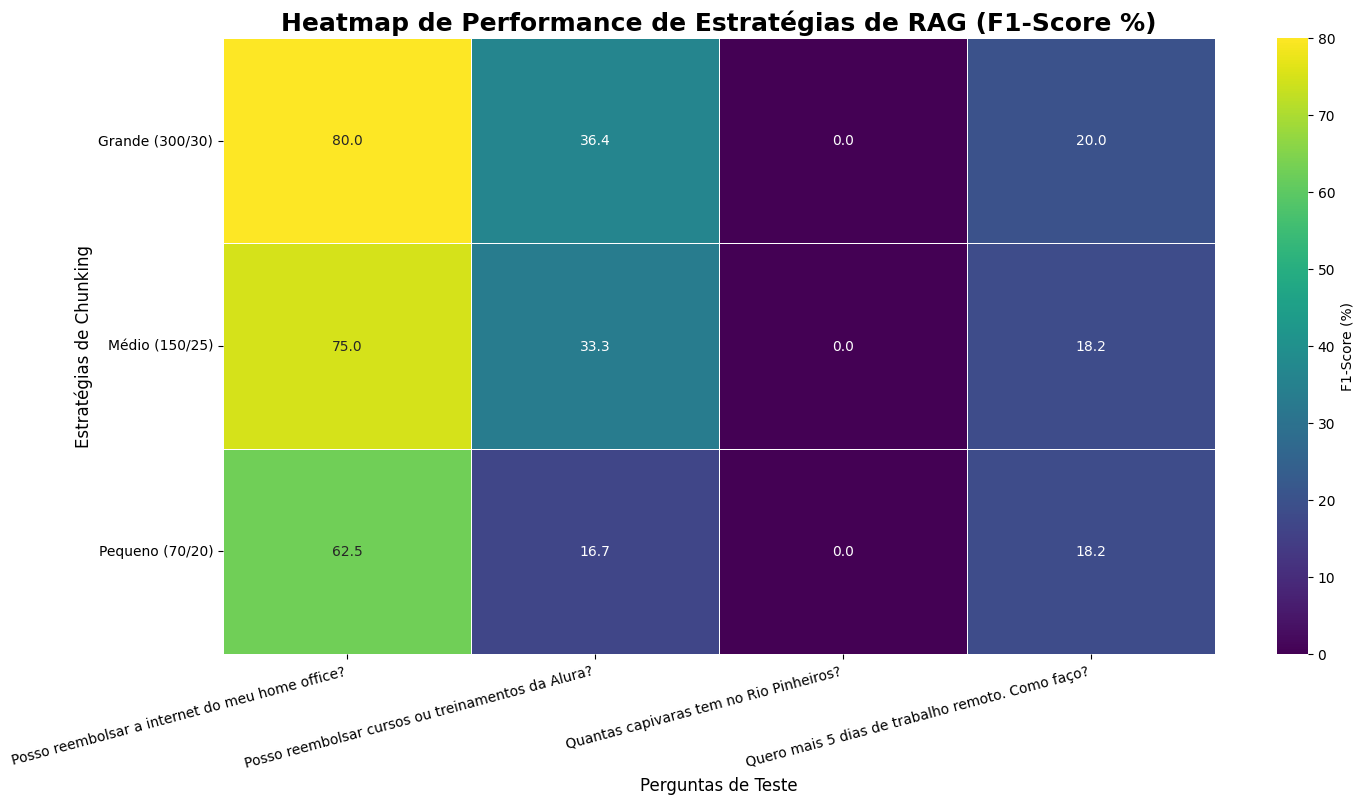


🏆 ANÁLISE FINAL AGREGADA DOS RESULTADOS
📊 TABELA DE PERFORMANCE MÉDIA:
     Estratégia  Avg_F1_Score  Avg_Precision  Avg_Recall
Grande (300/30)         34.09          25.00       75.00
 Médio (150/25)         31.63          22.50       75.00
Pequeno (70/20)         24.34          17.50       58.33

🥇 ESTRATÉGIA VENCEDORA (Maior Média de F1-Score): 'Grande (300/30)'
   - ⚖️ Média de F1-Score: 34.09%
   - 🎯 Média de Precision: 25.00%
   - 🎣 Média de Recall: 75.00%

💡 RECOMENDAÇÃO:
A estratégia vencedora demonstrou o melhor equilíbrio de performance em todo o conjunto de testes.
O heatmap acima mostra visualmente a consistência de cada estratégia. Estratégias com cores consistentemente 'quentes' (amarelo/verde) são as mais robustas.

💾 Resultados da análise comparativa exportados para: rag_analysis_results_20250913_022020.csv


In [ ]:
if __name__ == "__main__":
    main()

##Possiveis Melhorias

1- Fallback Api

#### **Nova Célula: Configuração de Modelos com Fallback**

Substituir a célula de "Etapa 1: Configurando Modelos" por esta.

```python
# CÉLULA DE CONFIGURAÇÃO AVANÇADA (com Fallback de API Key)

def setup_models_with_fallback(api_key_names: List[str]) -> Tuple[Optional[ChatGoogleGenerativeAI], Optional[GoogleGenerativeAIEmbeddings]]:
    """
    Tenta inicializar os modelos do Gemini com uma lista de chaves de API em ordem.
    Retorna o primeiro par de modelos que funcionar com sucesso.
    """
    from google.colab import userdata
    
    for key_name in api_key_names:
        print(f"🔄 Tentando inicializar com a chave: '{key_name}'...")
        api_key = userdata.get(key_name)
        
        if not api_key:
            print(f"  - ⚠️ Chave '{key_name}' não encontrada nos segredos. Pulando.")
            continue
            
        try:
            # Tenta inicializar ambos os serviços com a chave atual
            llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0, api_key=api_key)
            embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001", api_key=api_key)
            
            # (Opcional) Poderíamos fazer uma pequena chamada de teste aqui para validar a chave,
            # mas por enquanto, a inicialização já é um bom teste.
            
            print(f"  - ✅ Sucesso! Modelos configurados com a chave '{key_name}'.")
            return llm, embeddings
            
        except Exception as e:
            # Captura qualquer erro (rate limit, chave inválida, etc.)
            print(f"  - ❌ Falha com a chave '{key_name}'. Erro: {str(e)[:100]}...") # Mostra preview do erro
            continue # Tenta a próxima chave

    print("\n❌ ERRO FATAL: Nenhuma das chaves de API fornecidas funcionou.")
    return None, None

```

### **Como Usar Isso no seu `main()`**

Agora, a sua célula `main()` fica incrivelmente limpa e legível. Ela apenas define a lista de chaves e chama nossa nova função de setup.

**Na sua célula `main()`:**```python
# Dentro da sua função main()

# --- Etapa 1: Configurando Modelos com Fallback ---
print("\n--- Etapa 1: Configurando Modelos com Fallback ---")

# Defina a ordem de prioridade das suas chaves
api_key_prioridade = ['GEMINI_API_KEY', 'GEMINI_API_KEY_2']

# Chama a nossa nova função robusta
llm, embeddings = setup_models_with_fallback(api_key_prioridade)

if not llm or not embeddings:
    print("Encerrando a análise devido à falha na configuração dos modelos.")
    return

# Cria o adapter para o LLM que funcionou
llm_adapter = LLMAdapter(llm)


O Próximo Desafio (Otimização Avançada):
Com o chunking resolvido, o foco agora muda para melhorar a Precision@K. Suas próximas ações deveriam ser:

*     Aprimorar o Re-ranker: Experimente com prompts de re-ranking mais sofisticados. Peça ao LLM para não apenas ordenar, mas também dar uma pontuação de 1 a 10 para cada chunk e use essa pontuação para a ordenação final.
Melhorar a Busca Inicial: A busca vetorial pode ser o elo mais fraco. Pesquise e experimente com:
*    Modelos de Embedding Diferentes: Alguns modelos são melhores em capturar nuances semânticas do que outros.
*    Busca Híbrida: Combine a busca vetorial (semântica) com uma busca por palavra-chave tradicional (como BM25). Isso geralmente melhora muito a recuperação de documentos que contêm termos específicos.

In [ ]:
# Load the CSV file into a pandas DataFrame
results_df = pd.read_csv("/content/rag_analysis_results_20250913_022020.csv")

results_df

,Query,Estratégia,Precision (%),Recall (%),F1-Score (%),Acertos,Recuperados,Gabarito
0,Posso reembolsar a internet do meu home office?,Pequeno (70/20),50.000000,83.333333,62.500000,5,10,6
1,Posso reembolsar a internet do meu home office?,Médio (150/25),60.000000,100.000000,75.000000,6,10,6
2,Posso reembolsar a internet do meu home office?,Grande (300/30),66.666667,100.000000,80.000000,6,9,6
3,Quero mais 5 dias de trabalho remoto. Como faço?,Pequeno (70/20),10.000000,100.000000,18.181818,1,10,1
4,Quero mais 5 dias de trabalho remoto. Como faço?,Médio (150/25),10.000000,100.000000,18.181818,1,10,1
5,Quero mais 5 dias de trabalho remoto. Como faço?,Grande (300/30),11.111111,100.000000,20.000000,1,9,1
6,Posso reembolsar cursos ou treinamentos da Alura?,Pequeno (70/20),10.000000,50.000000,16.666667,1,10,2
7,Posso reembolsar cursos ou treinamentos da Alura?,Médio (150/25),20.000000,100.000000,33.333333,2,10,2
8,Posso reembolsar cursos ou treinamentos da Alura?,Grande (300/30),22.222222,100.000000,36.363636,2,9,2
9,Quantas capivaras tem no Rio Pinheiros?,Pequeno (70/20),0.000000,0.000000,0.000000,0,10,0
